<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

#importation bibliothèques graphiques
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
import seaborn as sb

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Tous les fichiers source ont un encodage utf-8 avec séparateur ','

#Importation du fichier population.csv
population = pd.read_csv('population_v3.csv', sep=',', encoding='utf-8')

#Importation du fichier dispo_alimentaire.csv
dispo_alm = pd.read_csv('dispo_alimentaire_v3.csv', sep=',', encoding='utf-8')

#Importation du fichier aide_alimentaire.csv
aide_alm = pd.read_csv('aide_alimentaire_v3.csv', sep=',', encoding='utf-8')

#Importation du fichier sous_nutrition.csv
sous_nutri = pd.read_csv('sous_nutrition_v3.csv', sep=',', encoding='utf-8')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le DataFrame population comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le DataFrame population comporte {} colonne(s)".format(population.shape[1]))

Le DataFrame population comporte 1416 observation(s) ou article(s)
Le DataFrame population comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("Nombre de colonnes :", population.shape[1])
display(population.dtypes)

for c in list(population):
    print("\nColonne", c, "- Nombre de valeurs NaN :", ((population[c]).isna()).sum())
    print("Colonne", c, "- Nombre de valeurs valides :", population.shape[0] - ((population[c]).isna()).sum())

Nombre de colonnes : 3


Zone       object
Année       int64
Valeur    float64
dtype: object


Colonne Zone - Nombre de valeurs NaN : 0
Colonne Zone - Nombre de valeurs valides : 1416

Colonne Année - Nombre de valeurs NaN : 0
Colonne Année - Nombre de valeurs valides : 1416

Colonne Valeur - Nombre de valeurs NaN : 0
Colonne Valeur - Nombre de valeurs valides : 1416


In [5]:
#Affichage les 5 premières lignes de la table
display(population.head(5))

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000, pour avoir des valeurs en unités, et non plus en milliers
population['Valeur'] *= 1000
#population = population.astype({'Valeur': int})
#remarque : vouloir utiliser des grands int dans les données crée des problèmes si on effectue des divisions
#On garde donc le type float

In [7]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
display(population.head(5))

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le DataFrame dispo_alm comporte {} observation(s) ou article(s)".format(dispo_alm.shape[0]))
print("Le DataFrame dispo_alm comporte {} colonne(s)".format(dispo_alm.shape[1]))

Le DataFrame dispo_alm comporte 15605 observation(s) ou article(s)
Le DataFrame dispo_alm comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :", dispo_alm.shape[1])
display(dispo_alm.dtypes)

for c in list(dispo_alm):
    print("\nColonne", c, "- Nombre de valeurs NaN :", ((dispo_alm[c]).isna()).sum())
    print("Colonne", c, "- Nombre de valeurs valides :", dispo_alm.shape[0] - ((dispo_alm[c]).isna()).sum())

Nombre de colonnes : 18


Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             


Colonne Zone - Nombre de valeurs NaN : 0
Colonne Zone - Nombre de valeurs valides : 15605

Colonne Produit - Nombre de valeurs NaN : 0
Colonne Produit - Nombre de valeurs valides : 15605

Colonne Origine - Nombre de valeurs NaN : 0
Colonne Origine - Nombre de valeurs valides : 15605

Colonne Aliments pour animaux - Nombre de valeurs NaN : 12885
Colonne Aliments pour animaux - Nombre de valeurs valides : 2720

Colonne Autres Utilisations - Nombre de valeurs NaN : 10109
Colonne Autres Utilisations - Nombre de valeurs valides : 5496

Colonne Disponibilité alimentaire (Kcal/personne/jour) - Nombre de valeurs NaN : 1364
Colonne Disponibilité alimentaire (Kcal/personne/jour) - Nombre de valeurs valides : 14241

Colonne Disponibilité alimentaire en quantité (kg/personne/an) - Nombre de valeurs NaN : 1590
Colonne Disponibilité alimentaire en quantité (kg/personne/an) - Nombre de valeurs valides : 14015

Colonne Disponibilité de matière grasse en quantité (g/personne/jour) - Nombre de valeurs 

In [11]:
#Affichage les 5 premières lignes de la table
display(dispo_alm.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,Agrumes - Autres,vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alm = dispo_alm.fillna(0.0)
display(dispo_alm.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,Agrumes - Autres,vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
liste_num_colonnes_kt = [3,4] + list(range(9,18))

for i in liste_num_colonnes_kt:
    dispo_alm[list(dispo_alm)[i]] *= 1000000

# On précise dans l'intitulé des colonnes que celles-ci sont en kg -> inutile
# dispo_alm = dispo_alm.rename(columns={list(dispo_alm)[i]: list(dispo_alm)[i]+" (kg)" for i in liste_num_colonnes_kt})

In [14]:
#Affichage les 5 premières lignes de la table
display(dispo_alm.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,Agrumes - Autres,vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Liste des zones pour lesquelles on n'a pas de données de disponibilité alimentaire
test = pd.merge(population, dispo_alm, how='outer', left_on='Zone', right_on='Zone')
display((test.loc[test['Produit'].isna(),'Zone']).unique())

array(['Andorre', 'Anguilla', 'Antilles néerlandaises (ex)', 'Aruba',
       'Bahreïn', 'Bhoutan', 'Burundi', 'Comores', 'Curaçao', 'Gibraltar',
       'Groenland', 'Guadeloupe', 'Guam', 'Guinée équatoriale',
       'Guyane française', 'Iles afro-britanniques', 'Libye',
       'Liechtenstein', 'Martinique', 'Mayotte',
       'Micronésie (États fédérés de)', 'Monaco', 'Montserrat', 'Nauru',
       'Nioué', 'Palaos', 'Palestine', 'Papouasie-Nouvelle-Guinée',
       'Pays-Bas caribéens', 'Porto Rico', 'Qatar',
       'République arabe syrienne', 'République démocratique du Congo',
       'Réunion', 'Sahara occidental', 'Saint-Barthélemy', 'Saint-Marin',
       'Saint-Martin (partie française)', 'Saint-Pierre-et-Miquelon',
       'Saint-Siège', 'Samoa américaines', 'Seychelles', 'Singapour',
       'Sint Maarten  (partie néerlandaise)', 'Somalie', 'Soudan du Sud',
       'Tokélaou', 'Tonga', 'Tuvalu', 'Érythrée', 'Île de Man',
       'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook',
  

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [16]:
#Afficher les dimensions du dataset
print("Le DataFrame aide_alm comporte {} observation(s) ou article(s)".format(aide_alm.shape[0]))
print("Le DataFrame aide_alm comporte {} colonne(s)".format(aide_alm.shape[1]))

Le DataFrame aide_alm comporte 1475 observation(s) ou article(s)
Le DataFrame aide_alm comporte 4 colonne(s)


In [17]:
#Consulter le nombre de colonnes

print("Nombre de colonnes :", aide_alm.shape[1])
display(aide_alm.dtypes)

for c in list(aide_alm):
    print("\nColonne", c, "- Nombre de valeurs NaN :", ((aide_alm[c]).isna()).sum())
    print("Colonne", c, "- Nombre de valeurs valides :", aide_alm.shape[0] - ((aide_alm[c]).isna()).sum())

Nombre de colonnes : 4


Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object


Colonne Pays bénéficiaire - Nombre de valeurs NaN : 0
Colonne Pays bénéficiaire - Nombre de valeurs valides : 1475

Colonne Année - Nombre de valeurs NaN : 0
Colonne Année - Nombre de valeurs valides : 1475

Colonne Produit - Nombre de valeurs NaN : 0
Colonne Produit - Nombre de valeurs valides : 1475

Colonne Valeur - Nombre de valeurs NaN : 0
Colonne Valeur - Nombre de valeurs valides : 1475


In [18]:
#Affichage les 5 premières lignes de la table
aide_alm.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [19]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alm = aide_alm.rename(columns={'Pays bénéficiaire': 'Zone'})

In [20]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alm['Valeur'] *= 1000

In [21]:
#Affichage les 5 premières lignes de la table
aide_alm.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [22]:
#Liste des zones pour lesquelles on n'a pas de données d'aide alimentaire
test = pd.merge(population, aide_alm, how='outer', left_on='Zone', right_on='Zone')
display((test.loc[test['Produit'].isna(),'Zone']).unique())

array(['Afrique du Sud', 'Albanie', 'Allemagne', 'Andorre', 'Anguilla',
       'Antigua-et-Barbuda', 'Antilles néerlandaises (ex)',
       'Arabie saoudite', 'Argentine', 'Arménie', 'Aruba', 'Australie',
       'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Barbade',
       'Belgique', 'Belize', 'Bermudes', 'Bosnie-Herzégovine', 'Botswana',
       'Brunéi Darussalam', 'Brésil', 'Bulgarie', 'Bélarus', 'Cabo Verde',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine - Taiwan', 'Chypre', 'Costa Rica',
       'Croatie', 'Curaçao', 'Danemark', 'Dominique', 'Espagne',
       'Estonie', 'Fidji', 'Finlande', 'France', 'Fédération de Russie',
       'Gabon', 'Gibraltar', 'Grenade', 'Groenland', 'Grèce',
       'Guadeloupe', 'Guam', 'Guinée équatoriale', 'Guyana',
       'Guyane française', 'Hongrie', 'Iles afro-britanniques', 'Inde',
       'Indonésie', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque',
       'Japon', 'Kazakhstan', 'Kiribati', 'Ko

In [23]:
# Liste des pays ayant reçu de l'aide alimentaire
display((aide_alm['Zone']).unique())

array(['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Bénin',
       'Bhoutan', 'Bolivie (État plurinational de)', 'Burkina Faso',
       'Burundi', 'Cambodge', 'Cameroun', 'Chine - continentale',
       'Colombie', 'Comores', 'Congo', "Côte d'Ivoire", 'Cuba',
       'Djibouti', 'Égypte', 'El Salvador', 'Équateur', 'Éthiopie',
       'Gambie', 'Géorgie', 'Ghana', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Haïti', 'Honduras',
       "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kenya',
       'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Libye',
       'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mozambique',
       'Myanmar', 'Népal', 'Nicaragua', 'Niger', 'Ouganda', 'Pakistan',
       'Palestine', 'Philippines', 'République arabe syrienne',
       'République centrafricaine', 'République démocratique du Congo',
       'République démocratique populaire lao', 'République dominicaine',
       'République populaire démocratique de Corée',
       'République-Unie de 

In [24]:
# Liste des pays ayant reçu de l'aide alimentaire mais dont on ne connaît pas les disponibilités alimentaires
test = pd.merge(dispo_alm, aide_alm, how='outer', left_on='Zone', right_on='Zone')
display((test.loc[test['Pertes'].isna(),'Zone']).unique())

array(['Bhoutan', 'Burundi', 'Comores', 'Libye', 'Palestine',
       'République arabe syrienne', 'République démocratique du Congo',
       'Somalie', 'Soudan du Sud'], dtype=object)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [25]:
#Afficher les dimensions du dataset
print("Le DataFrame sous_nutri comporte {} observation(s) ou article(s)".format(sous_nutri.shape[0]))
print("Le DataFrame sous_nutri comporte {} colonne(s)".format(sous_nutri.shape[1]))

Le DataFrame sous_nutri comporte 1218 observation(s) ou article(s)
Le DataFrame sous_nutri comporte 3 colonne(s)


In [26]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :", sous_nutri.shape[1])
display(sous_nutri.dtypes)

for c in list(sous_nutri):
    print("\nColonne", c, "- Nombre de valeurs NaN :", ((sous_nutri[c]).isna()).sum())
    print("Colonne", c, "- Nombre de valeurs valides :", sous_nutri.shape[0] - ((sous_nutri[c]).isna()).sum())

Nombre de colonnes : 3


Zone      object
Année     object
Valeur    object
dtype: object


Colonne Zone - Nombre de valeurs NaN : 0
Colonne Zone - Nombre de valeurs valides : 1218

Colonne Année - Nombre de valeurs NaN : 0
Colonne Année - Nombre de valeurs valides : 1218

Colonne Valeur - Nombre de valeurs NaN : 594
Colonne Valeur - Nombre de valeurs valides : 624


In [27]:
#Afficher les 5 premières lignes de la table
sous_nutri.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [28]:
#Conversion de la colonne sous nutrition en numérique
sous_nutri['Valeur'] = pd.to_numeric(sous_nutri['Valeur'], errors='coerce')

In [29]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutri = sous_nutri.astype({'Valeur': float})
sous_nutri = sous_nutri.fillna(0.0)
display(sous_nutri.dtypes)

Zone       object
Année      object
Valeur    float64
dtype: object

In [30]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutri = sous_nutri.rename(columns={'Valeur': 'Sous-nutrition'})

In [31]:
#Multiplication de la colonne sous_nutrition par 1000000 (et pas 1000)
sous_nutri['Sous-nutrition'] *= 1e6
#sous_nutri = sous_nutri.astype({'Sous-nutrition': int})
#remarque : vouloir utiliser des grands int dans les données crée des problèmes si on effectue des divisions
#On garde donc le type float

In [32]:
#Afficher les 5 premières lignes de la table
sous_nutri.head()

,Zone,Année,Sous-nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [33]:
# Liste des zones pour lesquelles on n'a pas de données de sous-nutrition
test = pd.merge(population, sous_nutri, how='outer', left_on='Zone', right_on='Zone')
display((test.loc[test['Sous-nutrition'].isna(),'Zone']).unique())

array(['Anguilla', 'Antilles néerlandaises (ex)', 'Aruba', 'Curaçao',
       'Gibraltar', 'Guadeloupe', 'Guam', 'Guyane française',
       'Iles afro-britanniques', 'Liechtenstein', 'Martinique', 'Mayotte',
       'Monaco', 'Montserrat', 'Pays-Bas caribéens', 'Réunion',
       'Sahara occidental', 'Saint-Barthélemy', 'Saint-Marin',
       'Saint-Martin (partie française)', 'Saint-Pierre-et-Miquelon',
       'Saint-Siège', 'Sint Maarten  (partie néerlandaise)', 'Île de Man',
       'Îles Anglo-Normandes', 'Îles Caïmanes',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Turques-et-Caïques', 'Îles Vierges américaines',
       'Îles Vierges britanniques', 'Îles Wallis-et-Futuna'], dtype=object)

In [34]:
# Liste des zones pour lesquelles on a des données de disponibilité alimentaire mais pas de données de sous-nutrition
test = pd.merge(dispo_alm, sous_nutri, how='outer', left_on='Zone', right_on='Zone')
display((test.loc[test['Sous-nutrition'].isna(),'Zone']).unique())

array([], dtype=object)

In [35]:
# Liste des zones pour lesquelles on a des données d'aide alimentaire mais pas de données de sous-nutrition
test = pd.merge(aide_alm, sous_nutri, how='outer', left_on='Zone', right_on='Zone')
display((test.loc[test['Sous-nutrition'].isna(),'Zone']).unique())

array([], dtype=object)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse des données pour présentation</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.0 - Vérification des égalités liées à la disponibilté intérieure</h3>
</div>

Théoriquement, la disponibilité intérieure de chaque produit pour un pays donné est égal :<br>
- d'une part à la somme des sources : importations - exportations + production + variation de stock ;<br>
- d'autre part à la somme des utilisations : pertes + nourriture + aliments pour animaux + semences + traitement + autres utilisations ;<br>
Vérifions si cela se confirme pour nos données

In [36]:
dispo_alm_verif = dispo_alm.copy()

dispo_alm_verif['Vérif sources'] = dispo_alm['Importations - Quantité'] - dispo_alm['Exportations - Quantité'] + dispo_alm['Production'] + dispo_alm['Variation de stock'] - dispo_alm['Disponibilité intérieure']

dispo_alm_verif['Vérif usages'] = dispo_alm['Pertes'] + dispo_alm['Nourriture'] + dispo_alm['Aliments pour animaux'] + dispo_alm['Semences'] + dispo_alm['Traitement'] + dispo_alm['Autres Utilisations'] - dispo_alm['Disponibilité intérieure']


In [37]:
DFcount_sour = (dispo_alm_verif.groupby('Vérif sources').count()).reset_index()
display(DFcount_sour)
print("Nombre de lignes pour lesquelles l'égalité Ssources = dispo est vérifiée :",(DFcount_sour[DFcount_sour['Vérif sources']==0]['Zone']).item())

,Vérif sources,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Vérif usages
0,-2000000.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,-1000000.0,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
2,0.0,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998,12998
3,1000000.0,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394


Nombre de lignes pour lesquelles l'égalité Ssources = dispo est vérifiée : 12998


L'égalité Somme(sources) = disponibilité intérieure est globalement très bien vérifiée, les quelques lignes pour lesquelles elle ne l'est pas correspondent à des erreurs d'arrondis lorsque les données brutes ont été saisies (ne pas oublier que les valeurs du DataFrame ont été multipliées par 1 000 000).

In [38]:
DFcount_util = (dispo_alm_verif.groupby('Vérif usages').count()).reset_index()
display(DFcount_util)
print("Nombre de lignes pour lesquelles l'égalité Ssources = dispo est vérifiée :",(DFcount_util[DFcount_util['Vérif usages']==0]['Zone']).item())

,Vérif usages,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Vérif sources
0,-7.620000e+08,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,-2.300000e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,-1.800000e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,-1.700000e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,-1.300000e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2.680000e+08,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
81,2.820000e+08,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
82,4.140000e+08,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
83,4.680000e+08,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Nombre de lignes pour lesquelles l'égalité Ssources = dispo est vérifiée : 13463


Pour l'égalité S(utilisations) = disponiblité intérieure, même si plus de lignes vérifient exactement cette égalité, on a aussi un nombre significatifs de lignes pour lesquelles le résidu est très important. Cela ne peut pas être imputé à des erreurs d'arrondi. Il y a eu soit des erreurs de saisie soit des données manquantes.

In [39]:
display((dispo_alm_verif.iloc[:,[0,1,-1]]).sort_values('Vérif usages'))

,Zone,Produit,Vérif usages
13051,Soudan,Sucre Eq Brut,-7.620000e+08
15379,États-Unis d'Amérique,Huile de Palme,-2.300000e+07
9520,Namibie,Citrons & Limes,-1.800000e+07
14366,Ukraine,Graisses Animales Crue,-1.700000e+07
13378,Suède,Huile de Palme,-1.300000e+07
...,...,...,...
15367,États-Unis d'Amérique,Graines Colza/Moutarde,2.680000e+08
2824,Canada,Céréales - Autres,2.820000e+08
652,Arabie saoudite,Lait - Excl Beurre,4.140000e+08
13783,Thaïlande,Fruits - Autres,4.680000e+08


Certaines des lignes de ce DataFrame mériteraient chacune une enquête approfondie.<br>
Par exemple, pour le sucre du Soudan, il s'avère que ce pays est la principale voie d'entrée du sucre pour le continent africain. Le sucre soudanais est très bon marché, il y a d'ailleurs [d'importantes raffineries de sucre situées au Soudan](https://www.zonebourse.com/cours/indice/S-P-GSCI-SUGAR-INDEX-46869137/actualite/Sucre-Le-Soudan-a-la-plus-importante-raffinerie-de-sucre-d-Afrique-14414902/). Peut-être que le champ 'Traitement' pour ce produit a été omis d'être saisi.<br>
L'abondance de cette ressource peut également générer de la [contrebande](https://www.rfi.fr/fr/emission/20151130-le-soudan-centre-une-contrebande-regionale-sucre), que notre fichier de disponibilité alimentaire ne peut pas tracer.<br>
<br>


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous-nutrition</h3>
</div>

In [40]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
# Le ciblage sur l'année 2017 sera fait plus tard,
# car il est intéressant de placer ces données dans leur contexte et de les mettre en perspective dans le temps

# On crée une colonne d'année approximative, moyenne des bornes indiquées indiquées dans la colonne Année
sous_nutri['Année approx'] = (sous_nutri['Année']).apply(lambda v: (int(v[0:4])+int(v[5:9]))//2)

data = pd.merge(population, sous_nutri, how='inner',
                left_on=['Zone','Année'], right_on=['Zone','Année approx'],
                suffixes=('', 's'))
data = data.drop('Année',axis=1)

In [41]:
#Affichage du dataset
display(data)

,Zone,Population,Années,Sous-nutrition,Année approx
0,Afghanistan,32269589.0,2012-2014,8600000.0,2013
1,Afghanistan,33370794.0,2013-2015,8800000.0,2014
2,Afghanistan,34413603.0,2014-2016,8900000.0,2015
3,Afghanistan,35383032.0,2015-2017,9700000.0,2016
4,Afghanistan,36296113.0,2016-2018,10500000.0,2017
...,...,...,...,...,...
1213,Zimbabwe,13586707.0,2013-2015,0.0,2014
1214,Zimbabwe,13814629.0,2014-2016,0.0,2015
1215,Zimbabwe,14030331.0,2015-2017,0.0,2016
1216,Zimbabwe,14236595.0,2016-2018,0.0,2017


In [42]:
#Calcul et affichage du nombre de personnes en état de sous nutrition pour chaque zone et chaque année
data['Proportion sous-nutrition (%)'] = round(100*data['Sous-nutrition']/data['Population'],2)

display(data[['Zone','Année approx','Proportion sous-nutrition (%)']])
display(data.sort_values('Proportion sous-nutrition (%)', ascending=False).head(10))
display(data.sort_values('Sous-nutrition', ascending=False).head(10))

,Zone,Année approx,Proportion sous-nutrition (%)
0,Afghanistan,2013,26.65
1,Afghanistan,2014,26.37
2,Afghanistan,2015,25.86
3,Afghanistan,2016,27.41
4,Afghanistan,2017,28.93
...,...,...,...
1213,Zimbabwe,2014,0.00
1214,Zimbabwe,2015,0.00
1215,Zimbabwe,2016,0.00
1216,Zimbabwe,2017,0.00


,Zone,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%)
468,Haïti,10400675.0,2012-2014,5100000.0,2013,49.04
473,Haïti,11123178.0,2017-2019,5400000.0,2018,48.55
469,Haïti,10549009.0,2013-2015,5100000.0,2014,48.35
472,Haïti,10982366.0,2016-2018,5300000.0,2017,48.26
471,Haïti,10839970.0,2015-2017,5200000.0,2016,47.97
947,République populaire démocratique de Corée,25549604.0,2017-2019,12200000.0,2018,47.75
470,Haïti,10695542.0,2014-2016,5100000.0,2015,47.68
946,République populaire démocratique de Corée,25429825.0,2016-2018,12000000.0,2017,47.19
945,République populaire démocratique de Corée,25307665.0,2015-2017,11600000.0,2016,45.84
944,République populaire démocratique de Corée,25183833.0,2014-2016,11200000.0,2015,44.47


,Zone,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%)
504,Inde,1.280842e+09,2012-2014,203800000.0,2013,15.91
505,Inde,1.295601e+09,2013-2015,198300000.0,2014,15.31
506,Inde,1.310152e+09,2014-2016,193100000.0,2015,14.74
507,Inde,1.324517e+09,2015-2017,190900000.0,2016,14.41
508,Inde,1.338677e+09,2016-2018,190100000.0,2017,14.20
509,Inde,1.352642e+09,2017-2019,189200000.0,2018,13.99
816,Pakistan,1.912608e+08,2012-2014,31100000.0,2013,16.26
817,Pakistan,1.953050e+08,2013-2015,28500000.0,2014,14.59
366,Éthiopie,9.538580e+07,2012-2014,26200000.0,2013,27.47
821,Pakistan,2.122283e+08,2017-2019,26100000.0,2018,12.30


In [43]:
#Si on veut la proportion globale (sur toutes les zones) de personnes en sous-nutrtion pour chaque année,
#il faut agréger les données par année
data_agg = data.groupby('Année approx')[['Population','Sous-nutrition']].sum()
# utilisation de la méthode reset_index() pour repasser Année approx en colonne et non en index
data_agg = data_agg.reset_index()
data_agg['Proportion sous-nutrition (%)'] = round(100*data_agg['Sous-nutrition'] / data_agg['Population'],2)
display(data_agg)

,Année approx,Population,Sous-nutrition,Proportion sous-nutrition (%)
0,2013,7.206670e+09,528100000.0,7.33
1,2014,7.291347e+09,523500000.0,7.18
2,2015,7.375818e+09,524700000.0,7.11
3,2016,7.460004e+09,528600000.0,7.09
4,2017,7.543799e+09,535700000.0,7.10
5,2018,7.626986e+09,544200000.0,7.14


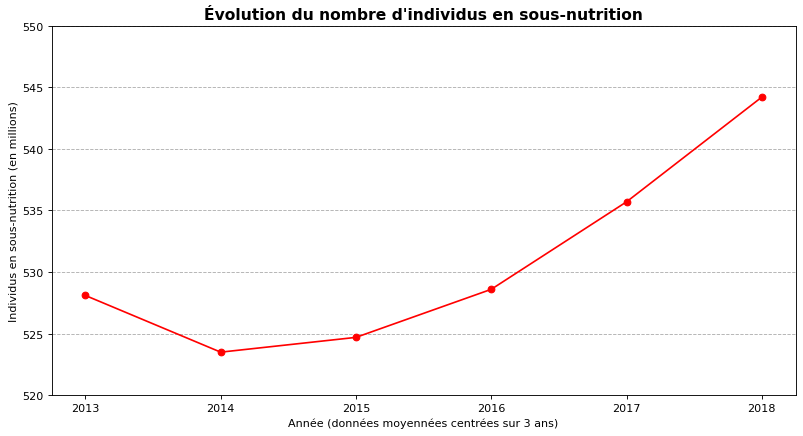

In [44]:
fig = plt.figure(figsize=(12,6), dpi=80)
# Graphique X-Y avec points reliés
plt.plot(data_agg['Année approx'],data_agg['Sous-nutrition']/1e6,'o-',color='red')
plt.xlabel("Année (données moyennées centrées sur 3 ans)", fontsize=10)
plt.ylabel("Individus en sous-nutrition (en millions)", fontsize=10)
#Resserrage de ma fenêtre pour mettre en valeur l'évolution
plt.ylim([520,550])
plt.yticks(np.linspace(520,550,num=7))
#Traits de repère
plt.grid(visible=True, axis='y', linestyle='--')
plt.title("Évolution du nombre d'individus en sous-nutrition",fontsize=14, fontweight='heavy')
plt.savefig("Individus_sous-nutrition.png")
plt.show()

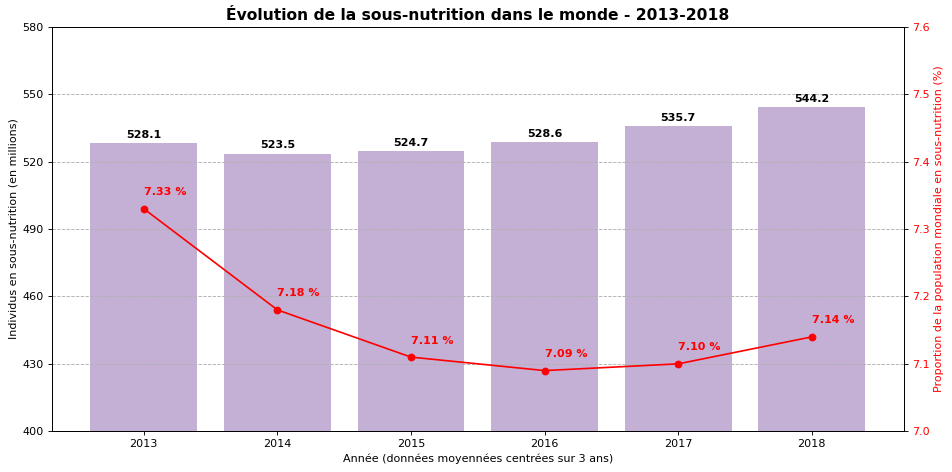

In [45]:
fig, ax1 = plt.subplots(figsize=(12,6), dpi=80)

p=ax1.bar(data_agg['Année approx'],data_agg['Sous-nutrition']/1e6, color=cm['tab20'](9))

plt.bar_label(p, label_type='edge',
              labels=(data_agg['Sous-nutrition'])/1e6, padding=3.0,
              fontsize=10, fontweight='bold')

ax1.set_xlabel("Année (données moyennées centrées sur 3 ans)", fontsize=10)
ax1.set_ylabel("Individus en sous-nutrition (en millions)", fontsize=10)
ax1.set_ylim([400,580])
ax1.set_yticks(np.linspace(400,580,7))
plt.grid(visible=True, axis='y', linestyle='--')

ax2 = ax1.twinx()  # crée un nouveau jeu d'axes avec le même axe x que ax1

ax2.plot(data_agg['Année approx'],data_agg['Proportion sous-nutrition (%)'],'-o',color='red')

for i in range(data_agg.shape[0]):
    ax2.annotate('%.2f' %data_agg['Proportion sous-nutrition (%)'][i] + ' %',
                 xy=(data_agg['Année approx'][i],data_agg['Proportion sous-nutrition (%)'][i]),
                 xytext=(data_agg['Année approx'][i],0.02+data_agg['Proportion sous-nutrition (%)'][i]),
                 textcoords='data', color='red', fontweight='heavy')

ax2.set_ylabel("Proportion de la population mondiale en sous-nutrition (%)", color='red')
ax2.set_ylim([7.0,7.6])
ax2.set_yticks(np.linspace(7.0,7.6,7))
ax2.tick_params(axis='y', labelcolor='red')
plt.title("Évolution de la sous-nutrition dans le monde - 2013-2018", fontsize=14, fontweight='heavy')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("Individus_sous-nutrition_combined.png")
plt.show()

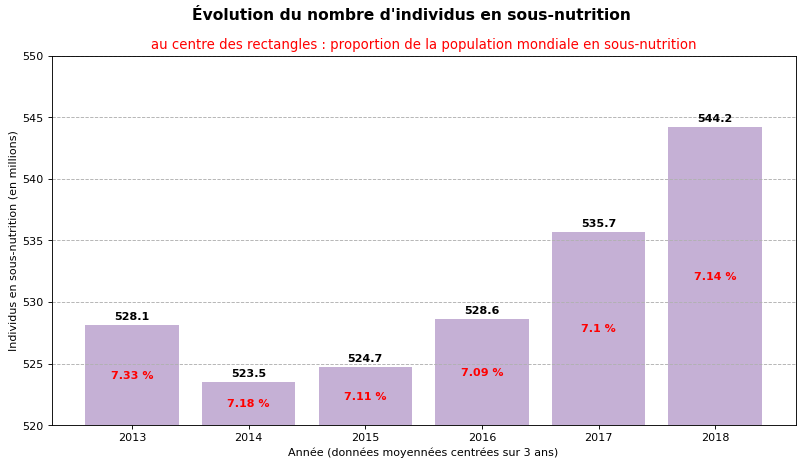

In [46]:
fig = plt.figure(figsize=(12,6), dpi=80)

# Graphique en barres avec étiquettes de données
p=plt.bar(data_agg['Année approx'],data_agg['Sous-nutrition']/1e6, color=cm['tab20'](9))

plt.bar_label(p, label_type='edge',
              labels=(data_agg['Sous-nutrition'])/1e6, padding=3.0,
              fontsize=10, fontweight='bold')

plt.bar_label(p, label_type='center',
              labels=(data_agg['Proportion sous-nutrition (%)']).apply(lambda x: str(x)+' %'),
              fontsize=10, color='red',fontweight='bold')

#plt.plot(data_agg['Année approx'],data_agg['Proportion sous-nutrition (%)'],'o-', color='red')
plt.xlabel("Année (données moyennées centrées sur 3 ans)", fontsize=10)
plt.ylabel("Individus en sous-nutrition (en millions)", fontsize=10)
plt.ylim([520,550])
plt.yticks(np.linspace(520,550,7))
plt.grid(visible=True, axis='y', linestyle='--')
plt.suptitle("Évolution du nombre d'individus en sous-nutrition",fontsize=14, fontweight='heavy')
plt.title("au centre des rectangles : proportion de la population mondiale en sous-nutrition", color='red')
plt.savefig("Individus_sous-nutrition.png")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personnes qui pourraient être nourries</h3>
</div>

Combien mange en moyenne un être humain ?<br>
Source : [https://www.anses.fr/fr/system/files/NUT2012SA0103Ra-2.pdf](https://www.anses.fr/fr/system/files/NUT2012SA0103Ra-2.pdf)<br>
Pour les femmes adultes (18-59 ans), le besoin énergétique moyen est d'environ 2100 kcal/jour.<br>
Pour les hommes adultes (18-69 ans), le besoin énergétique moyen est d'environ 2600 kcal/jour.<br>
<br>
Mais on peut voir la question différemment : en-dessous de quel seuil (en moyenne) est-on considéré en sous-nutrition ?<br>
D'après [ce document de la FAO](https://www.fao.org/fileadmin/templates/ess/documents/food_security_statistics/metadata/methologie_sousalimentation.pdf),
ce seuil est évalué à 1680 kcal/jour/personne.<br>
<br>
En supposant qu'il y a environ autant d'hommes que de femmes sur Terre, on retient la valeur de 2350 kcal/jour/personne, qui correspond aux besoins énergétiques moyens.

In [47]:
Besoin_moyen = 2350.0
Seuil_sousnutri = 1680.0
Abondance = 3000.0

In [48]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
# Attention, le fichier dispo_alimentaire.csv ne possède que les données de 2017
data_th = pd.merge(population.loc[population['Année']==2017,:], dispo_alm,
                how='inner', left_on='Zone', right_on='Zone')

In [49]:
#Affichage du nouveau dataframe
display(data_th)

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,Agrumes - Autres,vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
15601,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
15602,Zimbabwe,2017,14236595.0,Viande - Autre,animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
15603,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [50]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
data_th['dispo_kcal (/jour)'] = data_th['Population']*data_th['Disponibilité alimentaire (Kcal/personne/jour)']
print("Nombre de kcal disponibles par jour :",data_th['dispo_kcal (/jour)'].sum())

Nombre de kcal disponibles par jour : 21182162746926.0


In [51]:
#Calcul du nombre d'humains pouvant être nourris
print("Nombre d'êtres humains pouvant être nourris :", int(data_th['dispo_kcal (/jour)'].sum()/Besoin_moyen))

Nombre d'êtres humains pouvant être nourris : 9013686275


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personnes qui pourraient être nourries avec les produits végétaux</h3>
</div>

In [52]:
#Filtrage des données avec les produits d'origine végétale dans un nouveau dataframe
data_vege = data_th.loc[data_th['Origine']=='vegetale']
display(data_vege.head())

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal (/jour)
1,Afghanistan,2017,36296113.0,Agrumes - Autres,vegetale,0.0,0.0,1.0,1.29,0.01,...,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
6,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Calcul du nombre de kcal disponible pour les végétaux
print("Nombre de kcal d'origine végétale disponibles par jour :",data_vege['dispo_kcal (/jour)'].sum())

Nombre de kcal d'origine végétale disponibles par jour : 17449509418936.0


In [54]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
print("Nombre d'êtres humains pouvant être nourris avec une alimentation végétale :", int(data_vege['dispo_kcal (/jour)'].sum()/Besoin_moyen))

Nombre d'êtres humains pouvant être nourris avec une alimentation végétale : 7425323156


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [55]:
list(dispo_alm)

['Zone',
 'Produit',
 'Origine',
 'Aliments pour animaux',
 'Autres Utilisations',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'Variation de stock']

In [56]:
#Calcul de la disponibilité totale

data_util = dispo_alm.iloc[:,[9,13,12,3,15,16,4]]
display(data_util)

#On calcule la somme de chaque utilisation en sommant chaque colonne
data_util_agg = data_util.sum(axis=0)
display(data_util_agg)

,Disponibilité intérieure,Pertes,Nourriture,Aliments pour animaux,Semences,Traitement,Autres Utilisations
0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,0.0
1,41000000.0,2000000.0,39000000.0,0.0,0.0,0.0,0.0
2,2000000.0,0.0,2000000.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82000000.0,0.0,82000000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
15600,3000000.0,0.0,3000000.0,0.0,0.0,0.0,0.0
15601,2000000.0,0.0,2000000.0,0.0,0.0,0.0,0.0
15602,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Disponibilité intérieure    9.848994e+12
Pertes                      4.536980e+11
Nourriture                  4.876258e+12
Aliments pour animaux       1.304245e+12
Semences                    1.546810e+11
Traitement                  2.204687e+12
Autres Utilisations         8.650230e+11
dtype: float64

In [57]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
for i in list(range(data_util.shape[1])):
    print(list(data_util)[i],":",data_util_agg.iloc[i],"kg")

Disponibilité intérieure : 9848994000000.0 kg
Pertes : 453698000000.0 kg
Nourriture : 4876258000000.0 kg
Aliments pour animaux : 1304245000000.0 kg
Semences : 154681000000.0 kg
Traitement : 2204687000000.0 kg
Autres Utilisations : 865023000000.0 kg


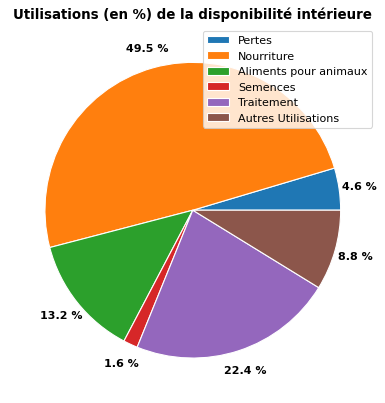

In [58]:
# Afficher un graphique type diagramme en secteurs pour la répartition des utilisations

fig = plt.figure(figsize=(6,6), dpi=80)

plt.pie(data_util_agg[1:], colors=sb.color_palette("tab10"),\
        startangle=00, pctdistance=1.14,\
        wedgeprops={'edgecolor': 'w'},\
        autopct=lambda x: f"{x:.1f} %",\
        textprops={'fontweight': 'bold'})
plt.legend(list(data_util)[1:], loc='best')
plt.title("Utilisations (en %) de la disponibilité intérieure", fontsize=12, fontweight='heavy')
plt.savefig("Individus_sous-nutrition.png")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [59]:
#Création d'une liste avec toutes les variables
# Les produits céréaliers dans le DataFrame dispo_alm sont les suivants :
# Avoine, Blé, Céréales - Autres, Maïs, Millet, Orge, Riz (Eq Blanchi), Seigle, Sorgho
# On met Céréales - Autres à la fin, car il est plus logique de placer ainsi une catégorie '... Autres'
liste_cereal = ['Avoine', 'Blé','Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho', 'Céréales - Autres']

In [60]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
data_cere = (dispo_alm[dispo_alm['Produit'].isin(liste_cereal)]).copy()
display(data_cere)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,Céréales - Autres,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,Céréales - Autres,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0


In [61]:
#Affichage de la proportion d'alimentation animale
data_cere['Proportion Aliments pour animaux (%)'] = round(100*data_cere['Aliments pour animaux'] / data_cere['Disponibilité intérieure'],2)
display(data_cere.iloc[:,[0,1,9,-1]])

,Zone,Produit,Disponibilité intérieure,Proportion Aliments pour animaux (%)
7,Afghanistan,Blé,5.992000e+09,0.0
12,Afghanistan,Céréales - Autres,0.000000e+00,NaN
32,Afghanistan,Maïs,3.130000e+08,63.9
34,Afghanistan,Millet,1.300000e+07,0.0
40,Afghanistan,Orge,5.240000e+08,68.7
...,...,...,...,...
15545,Îles Salomon,Céréales - Autres,0.000000e+00,NaN
15568,Îles Salomon,Maïs,0.000000e+00,NaN
15575,Îles Salomon,Orge,1.000000e+06,0.0
15591,Îles Salomon,Riz (Eq Blanchi),4.900000e+07,0.0


,Produit,Aliments pour animaux
0,Avoine,1.625100e+10
1,Blé,1.296680e+11
2,Maïs,5.461160e+11
3,Millet,3.306000e+09
4,Orge,9.265800e+10
5,Riz (Eq Blanchi),3.359400e+10
6,Seigle,8.099000e+09
7,Sorgho,2.480800e+10
8,Autres céréales,1.903500e+10


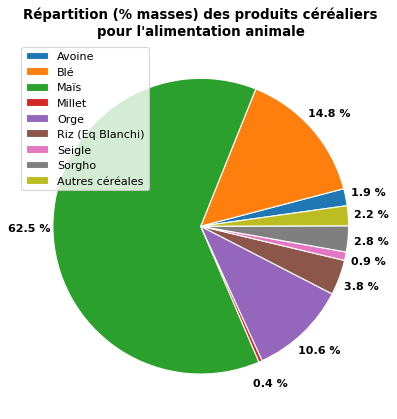

In [62]:
# Afficher un graphique type diagramme en secteurs - produits céréaliers servant à l'alimentation animale

data_cere_ani = (data_cere.groupby('Produit')['Aliments pour animaux'].sum()).reset_index()

# On classe les noms de céréales pour mettre 'Autres céréales' à la fin
clef = (data_cere_ani['Produit']).map({liste_cereal[i]:i for i in range(len(liste_cereal))})
data_cere_ani = data_cere_ani.iloc[clef.argsort()]
data_cere_ani.reset_index(drop=True, inplace=True)

data_cere_ani.loc[data_cere_ani['Produit'] == 'Céréales - Autres','Produit'] = 'Autres céréales'

display(data_cere_ani)

fig = plt.figure(figsize=(6,6), dpi=80)

plt.pie(data_cere_ani['Aliments pour animaux'], colors=sb.color_palette("tab10"),\
        startangle=8, pctdistance=1.16,\
        wedgeprops={'edgecolor': 'w'},\
        autopct=lambda x: f"{x:.1f} %",\
        textprops={'fontweight': 'bold'})
plt.legend(data_cere_ani['Produit'], loc='best')
plt.title("Répartition (% masses) des produits céréaliers\npour l'alimentation animale", fontsize=12, fontweight='heavy')
plt.savefig("Cereales_animaux.png")
plt.show()

In [63]:
#Affichage de la proportion d'alimentation animale
data_cere['Proportion Aliments pour humains (%)'] = round(100*data_cere['Nourriture'] / data_cere['Disponibilité intérieure'],2)
display(data_cere.iloc[:,[0,1,9,-2,-1]])

,Zone,Produit,Disponibilité intérieure,Proportion Aliments pour animaux (%),Proportion Aliments pour humains (%)
7,Afghanistan,Blé,5.992000e+09,0.0,81.69
12,Afghanistan,Céréales - Autres,0.000000e+00,NaN,NaN
32,Afghanistan,Maïs,3.130000e+08,63.9,24.28
34,Afghanistan,Millet,1.300000e+07,0.0,92.31
40,Afghanistan,Orge,5.240000e+08,68.7,16.98
...,...,...,...,...,...
15545,Îles Salomon,Céréales - Autres,0.000000e+00,NaN,NaN
15568,Îles Salomon,Maïs,0.000000e+00,NaN,NaN
15575,Îles Salomon,Orge,1.000000e+06,0.0,0.00
15591,Îles Salomon,Riz (Eq Blanchi),4.900000e+07,0.0,73.47


,Produit,Nourriture
0,Avoine,3.903000e+09
1,Blé,4.578240e+11
2,Maïs,1.251840e+11
3,Millet,2.304000e+10
4,Orge,6.794000e+09
5,Riz (Eq Blanchi),3.772860e+11
6,Seigle,5.502000e+09
7,Sorgho,2.415300e+10
8,Autres céréales,5.324000e+09


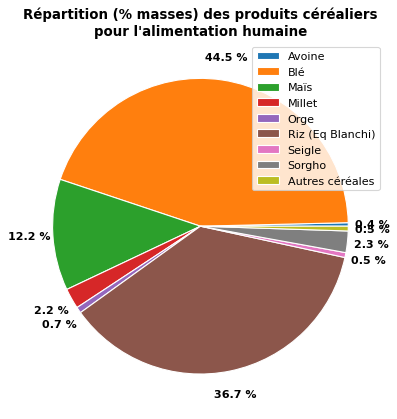

In [64]:
# Afficher un graphique type diagramme en secteurs - produits céréaliers servant à l'alimentation humaine

data_cere_hum = (data_cere.groupby('Produit')['Nourriture'].sum()).reset_index()

# On classe les noms de céréales pour mettre 'Autres céréales' à la fin
clef = (data_cere_hum['Produit']).map({liste_cereal[i]:i for i in range(len(liste_cereal))})
data_cere_hum = data_cere_hum.iloc[clef.argsort()]
data_cere_hum.reset_index(drop=True, inplace=True)

data_cere_hum.loc[data_cere_hum['Produit'] == 'Céréales - Autres','Produit'] = 'Autres céréales'

display(data_cere_hum)

fig = plt.figure(figsize=(6,6), dpi=80)

plt.pie(data_cere_hum['Nourriture'], colors=sb.color_palette("tab10"),\
        startangle=0, pctdistance=1.16,\
        wedgeprops={'edgecolor': 'w'},\
        autopct=lambda x: f"{x:.1f} %",\
        textprops={'fontweight': 'bold'})
plt.legend(data_cere_hum['Produit'], loc='upper right')
plt.title("Répartition (% masses) des produits céréaliers\npour l'alimentation humaine", fontsize=12, fontweight='heavy')
plt.savefig("Cereales_humains.png")
plt.show()

,Disponibilité intérieure,Pertes,Nourriture,Aliments pour animaux,Semences,Traitement,Autres Utilisations
7,5.992000e+09,775000000.0,4.895000e+09,0.0,322000000.0,0.0,0.0
12,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0
32,3.130000e+08,31000000.0,7.600000e+07,200000000.0,5000000.0,0.0,0.0
34,1.300000e+07,1000000.0,1.200000e+07,0.0,0.0,0.0,0.0
40,5.240000e+08,52000000.0,8.900000e+07,360000000.0,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...
15545,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0
15568,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0
15575,1.000000e+06,0.0,0.000000e+00,0.0,0.0,1000000.0,0.0
15591,4.900000e+07,1000000.0,3.600000e+07,0.0,0.0,0.0,12000000.0


Disponibilité intérieure    2.406999e+12
Pertes                      1.071200e+11
Nourriture                  1.029010e+12
Aliments pour animaux       8.735350e+11
Semences                    6.853800e+10
Traitement                  9.458900e+10
Autres Utilisations         2.347870e+11
dtype: float64

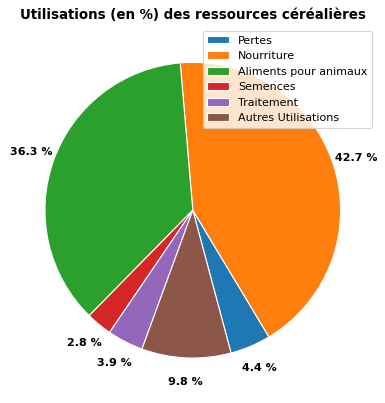

In [65]:
# Graphique en secteurs pour la répartition des utilisations de l'ensemble des ressources céréalières

data_cere_util = data_cere.iloc[:,[9,13,12,3,15,16,4]]
display(data_cere_util)
data_cere_util_agg = data_cere_util.sum(axis=0)
display(data_cere_util_agg)

fig = plt.figure(figsize=(6,6), dpi=80)

plt.pie(data_cere_util_agg[1:], colors=sb.color_palette("tab10"),\
        startangle=-75, pctdistance=1.16,\
        wedgeprops={'edgecolor': 'w'},\
        autopct=lambda x: f"{x:.1f} %",\
        textprops={'fontweight': 'bold'})
plt.legend(list(data_util)[1:], loc='best')
plt.title("Utilisations (en %) des ressources céréalières", fontsize=12, fontweight='heavy')
plt.savefig("Utilisations_cereales.png")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentées la plus forte en 2017</h3>
</div>

In [66]:
#Création de la colonne proportion par pays : déjà fait dans DataFrame data
#Il faut juste filtrer sur l'année 2017
display(data[data['Année approx']==2017])

,Zone,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%)
4,Afghanistan,36296113.0,2016-2018,10500000.0,2017,28.93
10,Afrique du Sud,57009756.0,2016-2018,3100000.0,2017,5.44
16,Albanie,2884169.0,2016-2018,100000.0,2017,3.47
22,Algérie,41389189.0,2016-2018,1300000.0,2017,3.14
28,Allemagne,82658409.0,2016-2018,0.0,2017,0.00
...,...,...,...,...,...,...
1192,Venezuela (République bolivarienne du),29402484.0,2016-2018,8000000.0,2017,27.21
1198,Viet Nam,94600648.0,2016-2018,6500000.0,2017,6.87
1204,Yémen,27834819.0,2016-2018,0.0,2017,0.00
1210,Zambie,16853599.0,2016-2018,0.0,2017,0.00


In [67]:
#affichage après tri des 10 pires pays
DFto_plot = ((data[data['Année approx']==2017]).sort_values('Proportion sous-nutrition (%)', ascending=False)[['Zone','Proportion sous-nutrition (%)']]).head(10)
display(DFto_plot)
DFto_plot.loc[DFto_plot['Zone'] == 'République populaire démocratique de Corée', 'Zone'] = 'Corée du Nord'
display(DFto_plot)

,Zone,Proportion sous-nutrition (%)
472,Haïti,48.26
946,République populaire démocratique de Corée,47.19
652,Madagascar,41.06
622,Libéria,38.28
604,Lesotho,38.25
1102,Tchad,37.96
970,Rwanda,35.06
730,Mozambique,32.81
1120,Timor-Leste,32.17
4,Afghanistan,28.93


,Zone,Proportion sous-nutrition (%)
472,Haïti,48.26
946,Corée du Nord,47.19
652,Madagascar,41.06
622,Libéria,38.28
604,Lesotho,38.25
1102,Tchad,37.96
970,Rwanda,35.06
730,Mozambique,32.81
1120,Timor-Leste,32.17
4,Afghanistan,28.93


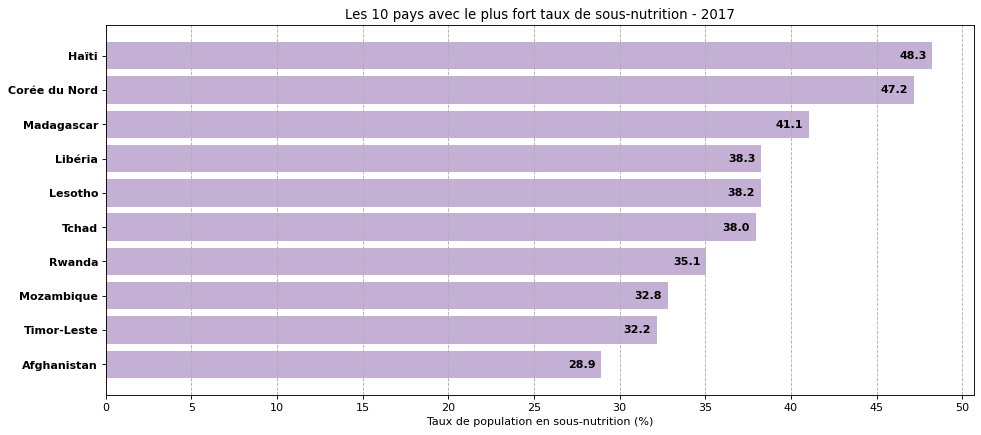

In [68]:
fig = plt.figure(figsize=(14,6), dpi=80)

p=plt.barh(DFto_plot.shape[0]-np.arange(DFto_plot.shape[0]),
           DFto_plot['Proportion sous-nutrition (%)'],
           tick_label=DFto_plot['Zone'], color=cm['tab20'](9))
plt.bar_label(p, label_type='edge', fmt='%.1f', padding=-30.0, fontsize=10, fontweight='bold')

plt.grid(visible=True, axis='x', linestyle='--')
plt.xticks(np.linspace(0,50,11))
plt.xlabel('Taux de population en sous-nutrition (%)')
plt.yticks(fontweight='bold')
plt.title("Les 10 pays avec le plus fort taux de sous-nutrition - 2017")
plt.savefig("Top10_sous-nutrition.png")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [69]:
#calcul du total de l'aide alimentaire par pays
data_aide_agg = (aide_alm.groupby(['Zone'])['Valeur'].sum()).reset_index()
data_aide_agg

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


,Zone,Valeur
51,Syrie,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
62,Soudan du Sud,695248000
61,Soudan,669784000
31,Kenya,552836000
3,Bangladesh,348188000
60,Somalie,292678000
54,Rép. Dém. du Congo,288502000
44,Niger,276344000


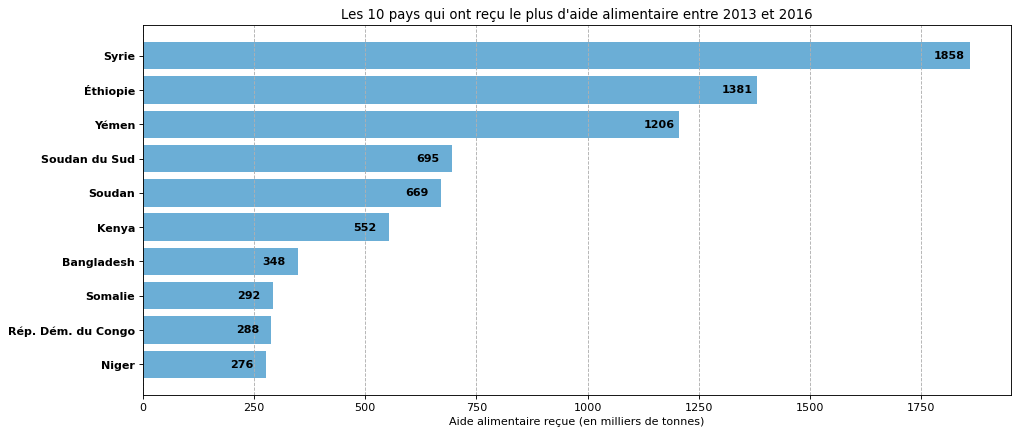

In [70]:
#affichage après tri des 10 pays qui ont bénéficié le plus de l'aide alimentaire
DFto_plot = data_aide_agg.sort_values('Valeur',ascending=False).head(10)

DFto_plot.loc[data_aide_agg['Zone']=='République arabe syrienne','Zone'] = 'Syrie'
DFto_plot.loc[data_aide_agg['Zone']=='République démocratique du Congo','Zone'] = 'Rép. Dém. du Congo'

display(DFto_plot)

fig = plt.figure(figsize=(14,6), dpi=80)

p=plt.barh(DFto_plot.shape[0]-np.arange(DFto_plot.shape[0]),
           DFto_plot['Valeur']/1e6,
           tick_label=DFto_plot['Zone'], color=cm['tab20c'](1))
plt.bar_label(p, label_type='edge', fmt='%d', padding=-32.0, fontsize=10, fontweight='bold')

plt.grid(visible=True, axis='x', linestyle='--')
plt.xlabel('Aide alimentaire reçue (en milliers de tonnes)')
plt.yticks(fontweight='bold')
plt.title("Les 10 pays qui ont reçu le plus d'aide alimentaire entre 2013 et 2016")
plt.savefig("Top10_aide.png")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficié de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [71]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
dfaide_agg = (pd.DataFrame(aide_alm.groupby(['Zone','Année'])['Valeur'].sum())).reset_index()
display(dfaide_agg)

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [72]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficié de l'aide alimentaire
liste5_aides = list(((dfaide_agg.groupby('Zone')['Valeur'].sum()).sort_values(ascending=False)).head(5).keys())
liste5_aides

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [73]:
#On filtre sur le dataframe avec notre liste
df5_evo = dfaide_agg[dfaide_agg['Zone'].isin(liste5_aides)]

In [74]:
# Affichage des pays avec l'aide alimentaire par année
df5_evo

DFto_plot = df5_evo.copy()

#Ajouts de 0 pour affichage graphique
#Pas de données pour une année -> aide alimentaire à 0
rows_list = []

for z in liste5_aides:
    for annee in range(2013,2017):
        dftmp = df5_evo.loc[df5_evo['Zone']==z]
        if (dftmp.loc[df5_evo['Année']==annee]).shape[0] == 0:
            dict = ({'Zone': z, 'Année': annee, 'Valeur': 0})
            rows_list.append(dict)

# DataFrame avec lignes aide = 0
DFnl = pd.DataFrame(rows_list)

#Concaténation des DatFrames
DFto_plot = pd.concat([DFto_plot,DFnl])

DFto_plot.loc[DFto_plot['Zone']=='République arabe syrienne','Zone'] = 'Syrie'

liste5_aides = list(((DFto_plot.groupby('Zone')['Valeur'].sum()).sort_values(ascending=False)).keys())

# On retrie par Zone puis Année
DFto_plot = DFto_plot.sort_values(['Zone','Année'])
display(DFto_plot)

,Zone,Année,Valeur
191,Soudan,2013,330230000
192,Soudan,2014,321904000
193,Soudan,2015,17650000
2,Soudan,2016,0
194,Soudan du Sud,2013,196330000
195,Soudan du Sud,2014,450610000
196,Soudan du Sud,2015,48308000
1,Soudan du Sud,2016,0
159,Syrie,2013,563566000
160,Syrie,2014,651870000


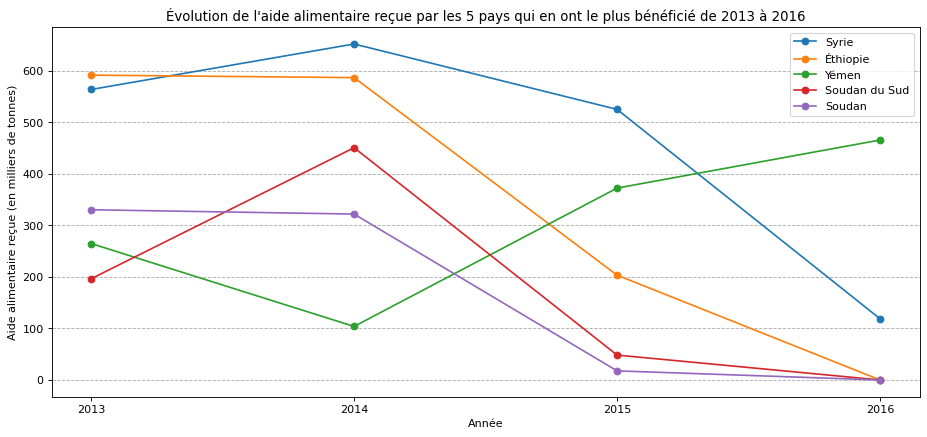

In [75]:
# Graphique à courbes multiples pour suivre l'évolution de l'aide apportées aux différents pays

fig = plt.figure(figsize=(14,6), dpi=80)

# Boucle sur les pays
for i in range(len(liste5_aides)):
    z = liste5_aides[i]
    plt.plot(DFto_plot.loc[DFto_plot['Zone']==z,'Année'],
             DFto_plot.loc[DFto_plot['Zone']==z,'Valeur']/1e6,
             'o-',color=cm['tab10'](i))

plt.grid(visible=True, axis='y', linestyle='--')
plt.xlabel('Année')
plt.ylabel('Aide alimentaire reçue (en milliers de tonnes)')
plt.xticks(np.linspace(2013,2016,4))
plt.legend(liste5_aides)
plt.title("Évolution de l'aide alimentaire reçue par les 5 pays qui en ont le plus bénéficié de 2013 à 2016")
plt.savefig("Top5Evo_aide.png")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [76]:
#Calcul de la disponibilité en kcal par personne par jour par pays
list(data_th)
data_dispo_ph = data_th.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
data_dispo_ph = data_dispo_ph.reset_index()
display(data_dispo_ph)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,128,Rép. centrafricaine,1879.0
1,166,Zambie,1924.0
2,91,Madagascar,2056.0
3,0,Afghanistan,2087.0
4,65,Haïti,2089.0
5,133,Corée du Nord,2093.0
6,151,Tchad,2109.0
7,167,Zimbabwe,2113.0
8,114,Ouganda,2126.0
9,154,Timor-Leste,2129.0


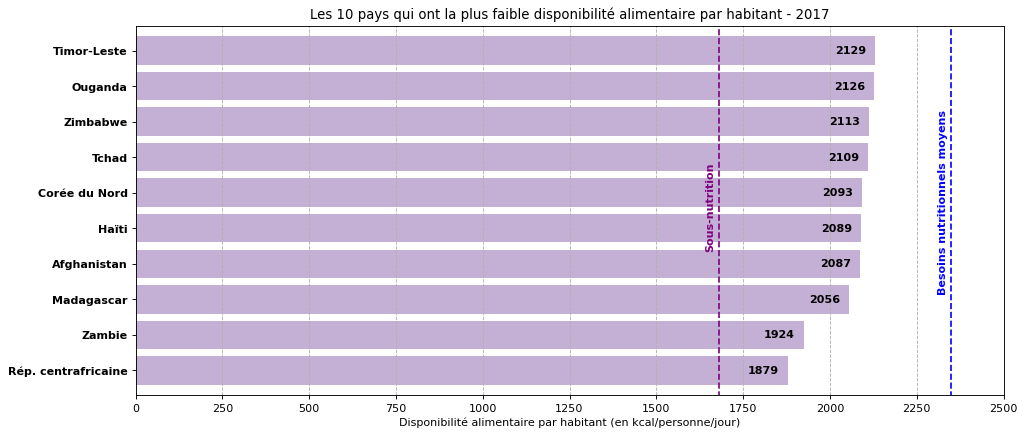

In [77]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
DFto_plot = (data_dispo_ph.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)).reset_index()
#display(DFto_plot)
DFto_plot.loc[DFto_plot['Zone']=='République centrafricaine','Zone'] = 'Rép. centrafricaine'
DFto_plot.loc[DFto_plot['Zone']=='République populaire démocratique de Corée','Zone'] = 'Corée du Nord'
display(DFto_plot)

fig = plt.figure(figsize=(14,6), dpi=80)

p=plt.barh(np.arange(DFto_plot.shape[0]),
           DFto_plot['Disponibilité alimentaire (Kcal/personne/jour)'],
           tick_label=DFto_plot['Zone'], color=cm['tab20'](9))
plt.bar_label(p, label_type='edge', fmt='%d', padding=-36.0, fontsize=10, fontweight='bold')

# Ajout de seuils (valeurs déterminées en 3.2) pour meilleure visualisation graphique 
plt.plot([Besoin_moyen]*13, np.linspace(-1.5,10.5,13), color='blue', linestyle='dashed')
plt.plot([Seuil_sousnutri]*13, np.linspace(-1.5,10.5,13), color='purple', linestyle='dashed')

plt.text(Seuil_sousnutri-40,3.4,"Sous-nutrition",rotation=90, color='purple',fontweight='bold')
plt.text(Besoin_moyen-40,2.2,"Besoins nutritionnels moyens",rotation=90, color='blue',fontweight='bold')

plt.grid(visible=True, axis='x', linestyle='--')
plt.xlabel('Disponibilité alimentaire par habitant (en kcal/personne/jour)')
plt.xticks(np.linspace(0,2500,11))
plt.ylim([-0.7,9.7])
plt.yticks(fontweight='bold')
plt.title("Les 10 pays qui ont la plus faible disponibilité alimentaire par habitant - 2017")
plt.savefig("Bottom10_dispo.png")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,11,Autriche,3770.0
1,16,Belgique,3737.0
2,159,Turquie,3708.0
3,171,États-Unis d'Amérique,3682.0
4,74,Israël,3610.0
5,72,Irlande,3602.0
6,75,Italie,3578.0
7,89,Luxembourg,3540.0
8,168,Égypte,3518.0
9,4,Allemagne,3503.0


,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,11,Autriche,3770.0
1,16,Belgique,3737.0
2,159,Turquie,3708.0
3,171,USA,3682.0
4,74,Israël,3610.0
5,72,Irlande,3602.0
6,75,Italie,3578.0
7,89,Luxembourg,3540.0
8,168,Égypte,3518.0
9,4,Allemagne,3503.0


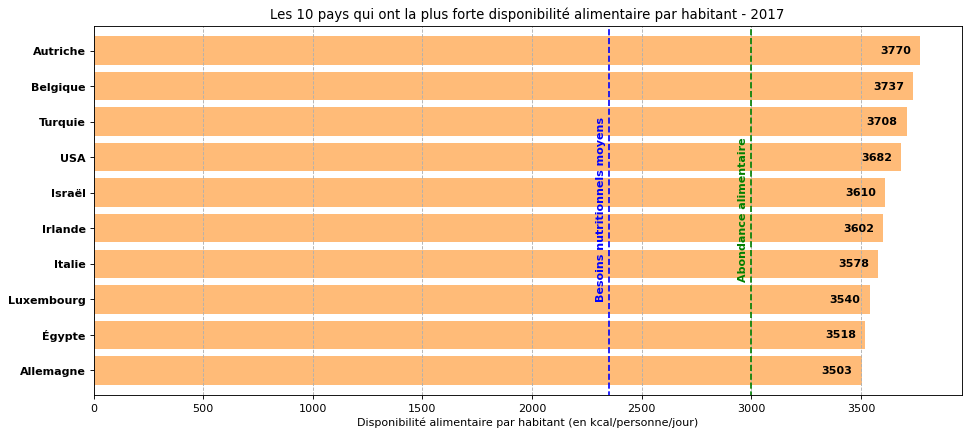

In [78]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
DFto_plot = (data_dispo_ph.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',
                                       ascending=False).head(10)).reset_index()
display(DFto_plot)
DFto_plot.loc[DFto_plot['Zone']=="États-Unis d'Amérique",'Zone'] = 'USA'
display(DFto_plot)

fig = plt.figure(figsize=(14,6), dpi=80)

p=plt.barh(DFto_plot.shape[0]-np.arange(DFto_plot.shape[0]),
           DFto_plot['Disponibilité alimentaire (Kcal/personne/jour)'],
           tick_label=DFto_plot['Zone'], color=cm['tab20'](3))
plt.bar_label(p, label_type='edge', fmt='%d', padding=-36.0, fontsize=10, fontweight='bold')

# Ajout de seuils pour meilleure compréhension
plt.plot([Besoin_moyen]*13, np.linspace(-0.5,11.5,13), color='blue', linestyle='dashed')
plt.text(Besoin_moyen-60,3.0,"Besoins nutritionnels moyens",rotation=90, color='blue',fontweight='bold')

plt.plot([Abondance]*13, np.linspace(-0.5,11.5,13), color='green', linestyle='dashed')
plt.text(Abondance-60,3.57,"Abondance alimentaire",rotation=90, color='green',fontweight='bold')

plt.grid(visible=True, axis='x', linestyle='--')
plt.xlabel('Disponibilité alimentaire par habitant (en kcal/personne/jour)')
plt.yticks(fontweight='bold')
plt.ylim([0.3,10.7])
plt.title("Les 10 pays qui ont la plus forte disponibilité alimentaire par habitant - 2017")
plt.savefig("Top10_dispo.png")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [79]:
#création d'un dataframe avec uniquement la Thaïlande 
data_THA = (data_th[data_th['Zone']=='Thaïlande']).copy()
display(data_THA)
display(list(data_THA))
display(data_THA[data_THA['Produit']=='Manioc'])

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal (/jour)
14305,Thaïlande,2017,69209810.0,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,...,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0,2.076294e+08
14306,Thaïlande,2017,69209810.0,Agrumes - Autres,vegetale,0.0,0.0,0.0,0.09,0.00,...,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0,0.000000e+00
14307,Thaïlande,2017,69209810.0,Alcool - non Comestible,vegetale,0.0,358000000.0,0.0,0.00,0.00,...,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0,0.000000e+00
14308,Thaïlande,2017,69209810.0,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,...,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0,1.384196e+08
14309,Thaïlande,2017,69209810.0,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,...,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0,6.920981e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,Thaïlande,2017,69209810.0,Viande de Suides,animale,0.0,0.0,124.0,13.00,11.83,...,871000000.0,2.200000e+07,1000000.0,871000000.0,0.0,8.910000e+08,0.0,0.0,0.0,8.582016e+09
14396,Thaïlande,2017,69209810.0,Viande de Volailles,animale,0.0,0.0,52.0,13.69,3.62,...,945000000.0,5.360000e+08,11000000.0,917000000.0,28000000.0,1.470000e+09,0.0,0.0,0.0,3.598910e+09
14397,Thaïlande,2017,69209810.0,Viande - Autre,animale,0.0,0.0,0.0,0.03,0.01,...,-92000000.0,9.600000e+07,4000000.0,2000000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
14398,Thaïlande,2017,69209810.0,Vin,vegetale,0.0,0.0,0.0,0.12,0.00,...,8000000.0,8.000000e+06,16000000.0,8000000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


['Zone',
 'Année',
 'Population',
 'Produit',
 'Origine',
 'Aliments pour animaux',
 'Autres Utilisations',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité intérieure',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'Variation de stock',
 'dispo_kcal (/jour)']

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal (/jour)
14355,Thaïlande,2017,69209810.0,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,...,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,2.768392e+09


In [80]:
#Calcul de la sous nutrition en Thaïlande
print("Rappel - d'après les données de sous-nutrition :")
display(data[data['Zone']=='Thaïlande'][['Zone','Année approx','Population','Sous-nutrition','Proportion sous-nutrition (%)']])
print("Disponibilité alimentaire totale en Thaïlande :", data_THA['Disponibilité alimentaire (Kcal/personne/jour)'].sum(),"Kcal/personne/jour")

Rappel - d'après les données de sous-nutrition :


,Zone,Année approx,Population,Sous-nutrition,Proportion sous-nutrition (%)
1110,Thaïlande,2013,68144518.0,6200000.0,9.10
1111,Thaïlande,2014,68438746.0,6000000.0,8.77
1112,Thaïlande,2015,68714511.0,5900000.0,8.59
1113,Thaïlande,2016,68971308.0,6000000.0,8.70
1114,Thaïlande,2017,69209810.0,6200000.0,8.96
1115,Thaïlande,2018,69428453.0,6500000.0,9.36


Disponibilité alimentaire totale en Thaïlande : 2785.0 Kcal/personne/jour


La Thaîlande a un taux de sous-nutrition autour de 9% de sa population totale, soit environ 6 millions de personnes, alors que sa disponibilité alimentaire intérieure totale devrait pourtant largement couvrir les besoins de l'ensemble de la population.<br>
Conclusion : l'accès aux ressources alimentaires en Thaïlande est très inégal, ce qui place environ 9% de sa population en situation de sous-nutrition.

In [81]:
# On calcule la proportion exportée en fonction de la disponibilité intérieure + exportations
# Exportations requalifiées ici comme utilisation, plutôt que de la retrancher de la disponibilité intérieure
data_THA['Proportion export (%)'] = round(100*data_THA['Exportations - Quantité'] / (data_THA['Exportations - Quantité'] + data_THA['Disponibilité intérieure']),2)
#display(list(data_THA))
#display((data_THA.loc[data_THA['Production']>0,[list(data_THA)[i] for i in [3,16,-3,12,13,11,-1]]]).sort_values('Proportion export (%)', ascending=False).head(15))
data_THA_manioc = (data_THA.loc[data_THA['Produit']=='Manioc']).copy()

THA_manioc_sour = data_THA_manioc.loc[:,[list(data_THA)[i] for i in [13,16,19,11,12]]]
THA_manioc_util = data_THA_manioc.loc[:,[list(data_THA)[i] for i in [11,12,15,14,5,6]]]

display(THA_manioc_sour)
display(THA_manioc_util)

,Importations - Quantité,Production,Variation de stock,Disponibilité intérieure,Exportations - Quantité
14355,1.250000e+09,3.022800e+10,0.0,6.264000e+09,2.521400e+10


,Disponibilité intérieure,Exportations - Quantité,Pertes,Nourriture,Aliments pour animaux,Autres Utilisations
14355,6.264000e+09,2.521400e+10,1.511000e+09,871000000.0,1.800000e+09,2.081000e+09


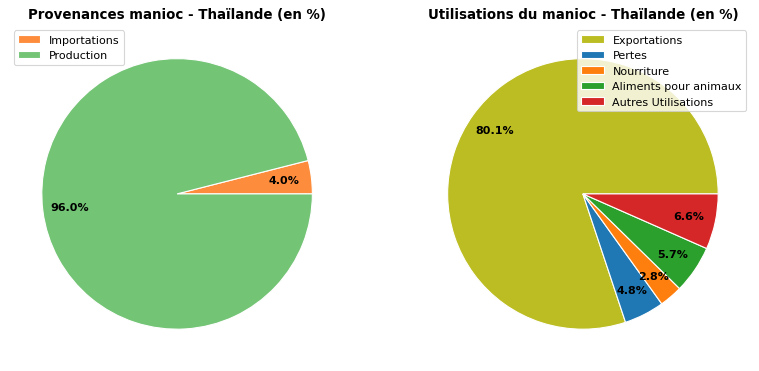

In [94]:
fig = plt.figure(figsize=(12,6), dpi=80)

plt.subplot(1,2,1)
plt.pie(THA_manioc_sour.iloc[0,[0,1]], pctdistance=0.8, colors=[cm['tab20c'](5),cm['tab20c'](9)],
        wedgeprops={'edgecolor': 'w'},autopct='%.1f%%', textprops={'fontweight': 'bold'})
plt.title('Provenances manioc - Thaïlande (en %)', fontsize=12, fontweight='heavy')
plt.legend(['Importations','Production'], loc='upper left')

plt.subplot(1,2,2)
plt.pie(THA_manioc_util.iloc[0,[1,2,3,4,5]], pctdistance=0.8,
        colors=[cm['tab10'](8)]+[cm['tab10'](i) for i in range(5)],
        wedgeprops={'edgecolor': 'w'},autopct='%.1f%%', textprops={'fontweight': 'bold'})
plt.title('Utilisations du manioc - Thaïlande (en %)', fontsize=12, fontweight='heavy')
plt.legend(['Exportations']+[list(data_THA)[i] for i in [15,14,5,6]], loc='upper right')

plt.savefig("Manioc.png")

plt.show()

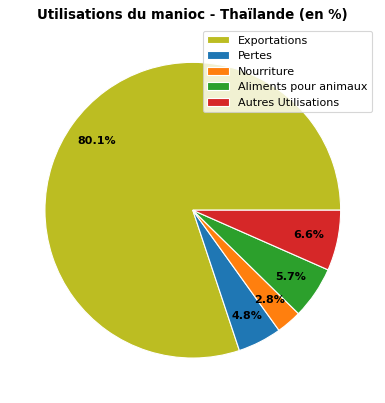

In [93]:
fig = plt.figure(figsize=(6,6), dpi=80)

plt.pie(THA_manioc_util.iloc[0,[1,2,3,4,5]], pctdistance=0.8,
        colors=[cm['tab10'](8)]+[cm['tab10'](i) for i in range(5)],
        wedgeprops={'edgecolor': 'w'},autopct='%.1f%%', textprops={'fontweight': 'bold'})
plt.title('Utilisations du manioc - Thaïlande (en %)', fontsize=12, fontweight='heavy')
plt.legend(['Exportations']+[list(data_THA)[i] for i in [15,14,5,6]], loc='upper right')

plt.savefig("Manioc_util.png")

plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [84]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.1 - Pays avec le plus grand nombre d'individus sous-alimentés en 2017</h3>
</div>

In [85]:
# Pays ayant le plus grand nombre d'individus (en valeur absolue) en sous-nutrition
# Les données qui nous intéressent sont déjà dans le DataFrame data

DFto_plot = ((data[data['Année approx']==2017]).sort_values('Sous-nutrition', ascending=False)).head(10)
#display(DFto_plot)
DFto_plot.loc[DFto_plot['Zone'] == 'République populaire démocratique de Corée', 'Zone'] = 'Corée du Nord'
DFto_plot.loc[DFto_plot['Zone'] == 'République-Unie de Tanzanie', 'Zone'] = 'Tanzanie'
display(DFto_plot)

,Zone,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%)
508,Inde,1.338677e+09,2016-2018,190100000.0,2017,14.20
820,Pakistan,2.079062e+08,2016-2018,24800000.0,2017,11.93
514,Indonésie,2.646510e+08,2016-2018,23600000.0,2017,8.92
772,Nigéria,1.908732e+08,2016-2018,22800000.0,2017,11.95
100,Bangladesh,1.596854e+08,2016-2018,21500000.0,2017,13.46
370,Éthiopie,1.063999e+08,2016-2018,21100000.0,2017,19.83
868,Philippines,1.051729e+08,2016-2018,15700000.0,2017,14.93
952,Tanzanie,5.466034e+07,2016-2018,13400000.0,2017,24.52
946,Corée du Nord,2.542982e+07,2016-2018,12000000.0,2017,47.19
580,Kenya,5.022114e+07,2016-2018,11900000.0,2017,23.70


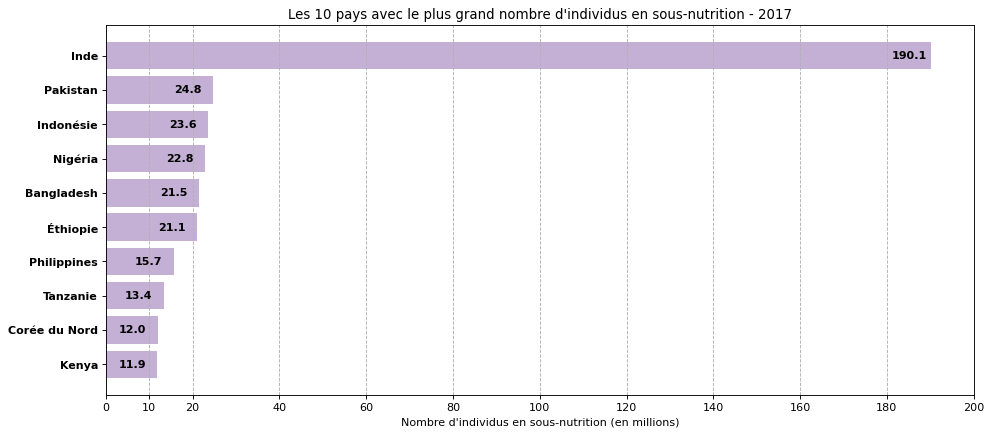

In [86]:
fig = plt.figure(figsize=(14,6), dpi=80)

p=plt.barh(DFto_plot.shape[0]-np.arange(DFto_plot.shape[0]),
           DFto_plot['Sous-nutrition']/1e6,
           tick_label=DFto_plot['Zone'], color=cm['tab20'](9))
plt.bar_label(p, label_type='edge', fmt='%.1f', padding=-35.0, fontsize=10, fontweight='bold')

plt.grid(visible=True, axis='x', linestyle='--')
plt.xticks([10]+list(np.linspace(0,200,11)))
plt.xlabel("Nombre d'individus en sous-nutrition (en millions)")
plt.yticks(fontweight='bold')
plt.title("Les 10 pays avec le plus grand nombre d'individus en sous-nutrition - 2017")
plt.savefig("Top10_Pop_sous-nutrition.png")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.2 - Analyse nombre d'individus sous-alimentés en 2017 vs. aide alimentaire cumulée reçue entre 2013 et 2016 pour chaque pays</h3>
</div>

In [1028]:
# Il faut d'abord réaliser une jointure entre l'aide agrégée par pays et le DataFrame précédent
display(dfaide_agg)
dfaide_agg_pays = (dfaide_agg.groupby('Zone')['Valeur'].sum()).reset_index()
display(dfaide_agg_pays)

data_aide_vs_sn = pd.merge(dfaide_agg_pays, data[data['Année approx']==2017],
                           how='outer', left_on=['Zone'], right_on=['Zone'])

data_aide_vs_sn_inner = pd.merge(dfaide_agg_pays, data[data['Année approx']==2017],
                                 how='inner', left_on=['Zone'], right_on=['Zone'])

data_aide_vs_sn = data_aide_vs_sn.rename(columns={'Valeur': 'Aide'})
print("Nombre de lignes en utilisant une jointure interne :",data_aide_vs_sn_inner.shape[0],"\n")

print("\nDonnées obtenues avec jointure externe :")
display(data_aide_vs_sn.sort_values('Sous-nutrition', ascending=False).head(10))

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


Nombre de lignes en utilisant une jointure interne : 76 


Données obtenues avec jointure externe :


,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%)
75,Inde,NaN,1.338677e+09,2016-2018,190100000.0,2017,14.20
127,Pakistan,2.310720e+08,2.079062e+08,2016-2018,24800000.0,2017,11.93
76,Indonésie,NaN,2.646510e+08,2016-2018,23600000.0,2017,8.92
118,Nigéria,NaN,1.908732e+08,2016-2018,22800000.0,2017,11.95
16,Bangladesh,3.481880e+08,1.596854e+08,2016-2018,21500000.0,2017,13.46
199,Éthiopie,1.381294e+09,1.063999e+08,2016-2018,21100000.0,2017,19.83
134,Philippines,1.717220e+08,1.051729e+08,2016-2018,15700000.0,2017,14.93
152,République-Unie de Tanzanie,1.720220e+08,5.466034e+07,2016-2018,13400000.0,2017,24.52
151,République populaire démocratique de Corée,1.874120e+08,2.542982e+07,2016-2018,12000000.0,2017,47.19
87,Kenya,5.528360e+08,5.022114e+07,2016-2018,11900000.0,2017,23.70


À noter que la jointure interne a conservé tous les pays (toutes les lignes) qui apparaisseient dans les données d'aide agrégées.<br>
Par contre, on remarque que 3 des 10 pays avec le plus d'individus en sous-nutrition n'ont pas reçu d'aide alimentaire de 2013 à 2016 : l'Inde, l'Indonésie et le Nigéria. Cela fait environ 236 millions de personnes en sous-nutrition et qui ne reçoivent pas d'aide alimentaire.

In [1029]:
data_aide_vs_sn['Aide / individu sous-nutrition'] = round(data_aide_vs_sn['Aide'] / data_aide_vs_sn['Sous-nutrition'],1)

# On filtre parmi les pays ceux qui ont un nombre significatif d'individus en sous-nutrition (>0)
DFto_plot = data_aide_vs_sn.loc[data_aide_vs_sn['Sous-nutrition']>0]

display(DFto_plot.sort_values('Aide / individu sous-nutrition', ascending=False).head(10))
display(DFto_plot.sort_values('Proportion sous-nutrition (%)', ascending=False).head(10))

,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%),Aide / individu sous-nutrition
103,Mali,1.495860e+08,18512430.0,2016-2018,1000000.0,2017,5.40,149.6
148,République dominicaine,8.450600e+07,10513104.0,2016-2018,600000.0,2017,5.71,140.8
166,Soudan,6.697840e+08,40813397.0,2016-2018,5000000.0,2017,12.25,134.0
107,Mauritanie,5.718200e+07,4282570.0,2016-2018,500000.0,2017,11.68,114.4
116,Nicaragua,1.153320e+08,6384846.0,2016-2018,1100000.0,2017,17.23,104.8
55,Eswatini,1.552800e+07,1124805.0,2016-2018,200000.0,2017,17.78,77.6
199,Éthiopie,1.381294e+09,106399924.0,2016-2018,21100000.0,2017,19.83,65.5
3,Algérie,8.111400e+07,41389189.0,2016-2018,1300000.0,2017,3.14,62.4
172,Sénégal,8.976200e+07,15419355.0,2016-2018,1500000.0,2017,9.73,59.8
174,Tchad,2.679660e+08,15016753.0,2016-2018,5700000.0,2017,37.96,47.0


,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%),Aide / individu sous-nutrition
72,Haïti,116450000.0,10982366.0,2016-2018,5300000.0,2017,48.26,22.0
151,République populaire démocratique de Corée,187412000.0,25429825.0,2016-2018,12000000.0,2017,47.19,15.6
99,Madagascar,96678000.0,25570512.0,2016-2018,10500000.0,2017,41.06,9.2
95,Libéria,19846000.0,4702226.0,2016-2018,1800000.0,2017,38.28,11.0
91,Lesotho,10624000.0,2091534.0,2016-2018,800000.0,2017,38.25,13.3
174,Tchad,267966000.0,15016753.0,2016-2018,5700000.0,2017,37.96,47.0
143,Rwanda,11408000.0,11980961.0,2016-2018,4200000.0,2017,35.06,2.7
112,Mozambique,58612000.0,28649018.0,2016-2018,9400000.0,2017,32.81,6.2
177,Timor-Leste,116000.0,1243258.0,2016-2018,400000.0,2017,32.17,0.3
0,Afghanistan,185452000.0,36296113.0,2016-2018,10500000.0,2017,28.93,17.7


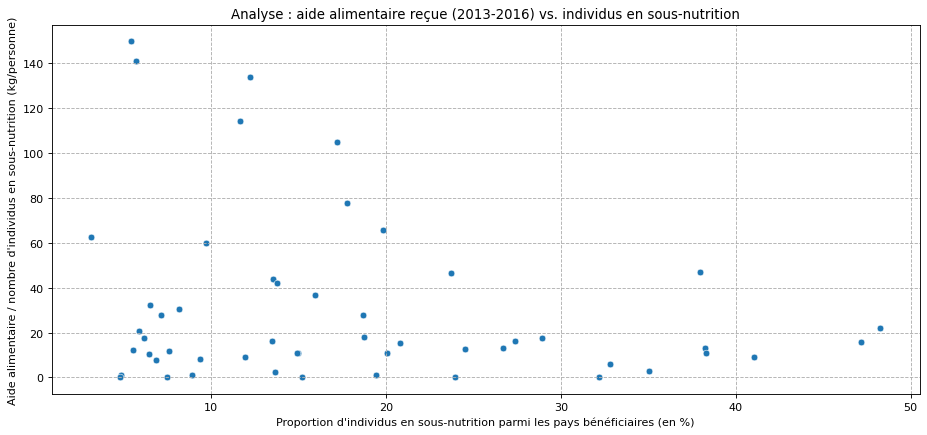

In [1030]:
# À noter que la jointure interne a conservé tous les pays (toutes les lignes) qui apparaisseient dans les données d'aide agrégées

fig = plt.figure(figsize=(14,6), dpi=80)

sb.scatterplot(data=DFto_plot,
               x='Proportion sous-nutrition (%)',
               y='Aide / individu sous-nutrition')

plt.xlabel("Proportion d'individus en sous-nutrition parmi les pays bénéficiaires (en %)")
plt.ylabel("Aide alimentaire / nombre d'individus en sous-nutrition (kg/personne)")
plt.grid(visible=True, axis='both', linestyle='--')
plt.title("Analyse : aide alimentaire reçue (2013-2016) vs. individus en sous-nutrition")

plt.show()

Ce graphique n'est pas rassurant : il suggère que l'aide alimentaire n'est pas positivment corrélée au taux de personnes en sous-nutrition, pour les pays recevant de l'aide alimentaire. On a aussi vu plus haut que certains pays très peuplés et qui avaient une importante population en situation de sous-nutrition ne recevaient même pas d'aide alimentaire (Inde, Indonésie, Nigéria). <br>
Comment expliquer cela ? <br>
Dans le cas de la Thaïlande, on avait vu qu'elle avait une disponibilité intérieure tout à fait correcte, mais que les ressources étaient inégalement réparties au sein de la population, si bien qu'environ 9% de la population thaïlandaise était en situation de sous-nutrition. Dans ce cas, il s'agit en fait de politique intérieure, et envoyer de l'aide alimentaire alors que les ressources existent déjà dans le pays concerné pourrait être au mieux inutile, au pire contre-productif.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.3 - Prise en compte de la disponibilité alimentaire pour déterminer les pays les plus vulnérables</h3>
</div>

On rappelle qu'on n'a aucune donnée sur les disponibilités alimentaires des 9 pays suivants, alors que ceux-ci reçoivent de l'aide alimentaire :<br>
Bhoutan, Burundi, Comores, Libye, Palestine, Syrie, République démocratique du Congo, Somalie, Soudan du Sud.

In [1031]:
# On ajoute donc les données de disponibilité alimentaire par habitant aux précédentes données
data_aide_vs_dispo = pd.merge(data_aide_vs_sn, data_dispo_ph,
                              how='outer', left_on=['Zone'], right_on=['Zone'])

display(data_aide_vs_dispo.sort_values('Sous-nutrition', ascending=False).head(10))


,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%),Aide / individu sous-nutrition,Disponibilité alimentaire (Kcal/personne/jour)
75,Inde,NaN,1.338677e+09,2016-2018,190100000.0,2017,14.20,NaN,2454.0
127,Pakistan,2.310720e+08,2.079062e+08,2016-2018,24800000.0,2017,11.93,9.3,2438.0
76,Indonésie,NaN,2.646510e+08,2016-2018,23600000.0,2017,8.92,NaN,2776.0
118,Nigéria,NaN,1.908732e+08,2016-2018,22800000.0,2017,11.95,NaN,2700.0
16,Bangladesh,3.481880e+08,1.596854e+08,2016-2018,21500000.0,2017,13.46,16.2,2453.0
199,Éthiopie,1.381294e+09,1.063999e+08,2016-2018,21100000.0,2017,19.83,65.5,2129.0
134,Philippines,1.717220e+08,1.051729e+08,2016-2018,15700000.0,2017,14.93,10.9,2568.0
152,République-Unie de Tanzanie,1.720220e+08,5.466034e+07,2016-2018,13400000.0,2017,24.52,12.8,2204.0
151,République populaire démocratique de Corée,1.874120e+08,2.542982e+07,2016-2018,12000000.0,2017,47.19,15.6,2093.0
87,Kenya,5.528360e+08,5.022114e+07,2016-2018,11900000.0,2017,23.70,46.5,2205.0


In [1032]:
display(data_aide_vs_dispo.loc[(data_aide_vs_dispo['Disponibilité alimentaire (Kcal/personne/jour)']).isna()])

,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%),Aide / individu sous-nutrition,Disponibilité alimentaire (Kcal/personne/jour)
5,Andorre,NaN,77001.0,2016-2018,0.0,2017,0.0,NaN,NaN
15,Bahreïn,NaN,1494076.0,2016-2018,0.0,2017,0.0,NaN,NaN
21,Bhoutan,2.666000e+06,745563.0,2016-2018,0.0,2017,0.0,inf,NaN
29,Burundi,7.731800e+07,10827019.0,2016-2018,0.0,2017,0.0,inf,NaN
43,Comores,7.806000e+06,813892.0,2016-2018,0.0,2017,0.0,inf,NaN
64,Groenland,NaN,56481.0,2016-2018,0.0,2017,0.0,NaN,NaN
68,Guinée équatoriale,NaN,1262002.0,2016-2018,0.0,2017,0.0,NaN,NaN
94,Libye,9.288000e+06,6580724.0,2016-2018,0.0,2017,0.0,inf,NaN
109,Micronésie (États fédérés de),NaN,111459.0,2016-2018,0.0,2017,0.0,NaN,NaN
115,Nauru,NaN,10573.0,2016-2018,0.0,2017,0.0,NaN,NaN


In [1033]:
display(data_aide_vs_dispo.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(20))

,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%),Aide / individu sous-nutrition,Disponibilité alimentaire (Kcal/personne/jour)
145,République centrafricaine,6.661000e+07,4596023.0,2016-2018,0.0,2017,0.00,inf,1879.0
192,Zambie,3.026000e+06,16853599.0,2016-2018,0.0,2017,0.00,inf,1924.0
99,Madagascar,9.667800e+07,25570512.0,2016-2018,10500000.0,2017,41.06,9.2,2056.0
0,Afghanistan,1.854520e+08,36296113.0,2016-2018,10500000.0,2017,28.93,17.7,2087.0
72,Haïti,1.164500e+08,10982366.0,2016-2018,5300000.0,2017,48.26,22.0,2089.0
151,République populaire démocratique de Corée,1.874120e+08,25429825.0,2016-2018,12000000.0,2017,47.19,15.6,2093.0
174,Tchad,2.679660e+08,15016753.0,2016-2018,5700000.0,2017,37.96,47.0,2109.0
193,Zimbabwe,6.257000e+07,14236595.0,2016-2018,0.0,2017,0.00,inf,2113.0
125,Ouganda,6.462200e+07,41166588.0,2016-2018,0.0,2017,0.00,inf,2126.0
177,Timor-Leste,1.160000e+05,1243258.0,2016-2018,400000.0,2017,32.17,0.3,2129.0


In [1034]:
display(data_aide_vs_dispo.sort_values('Aide', ascending=False).head(10))

,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%),Aide / individu sous-nutrition,Disponibilité alimentaire (Kcal/personne/jour)
144,République arabe syrienne,1.858943e+09,17095678.0,2016-2018,0.0,2017,0.00,inf,NaN
199,Éthiopie,1.381294e+09,106399924.0,2016-2018,21100000.0,2017,19.83,65.5,2129.0
191,Yémen,1.206484e+09,27834819.0,2016-2018,0.0,2017,0.00,inf,2217.0
167,Soudan du Sud,6.952480e+08,10910763.0,2016-2018,0.0,2017,0.00,inf,NaN
166,Soudan,6.697840e+08,40813397.0,2016-2018,5000000.0,2017,12.25,134.0,2335.0
87,Kenya,5.528360e+08,50221142.0,2016-2018,11900000.0,2017,23.70,46.5,2205.0
16,Bangladesh,3.481880e+08,159685424.0,2016-2018,21500000.0,2017,13.46,16.2,2453.0
165,Somalie,2.926780e+08,14589179.0,2016-2018,0.0,2017,0.00,inf,NaN
149,République démocratique du Congo,2.885020e+08,81398764.0,2016-2018,0.0,2017,0.00,inf,NaN
117,Niger,2.763440e+08,21602382.0,2016-2018,0.0,2017,0.00,inf,2549.0


Remarque importante : on n'a aucune donnée sur les disponibilités alimentaires de la Syrie, du Soudan du Sud, de la Somalie et de la République démocratique du Congo.

In [1035]:
DFto_plot = data_aide_vs_dispo.loc[data_aide_vs_dispo['Sous-nutrition']>0]

display(DFto_plot.sort_values('Aide / individu sous-nutrition', ascending=False).head(10))
display(DFto_plot.sort_values('Proportion sous-nutrition (%)', ascending=False).head(10))

,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%),Aide / individu sous-nutrition,Disponibilité alimentaire (Kcal/personne/jour)
103,Mali,1.495860e+08,18512430.0,2016-2018,1000000.0,2017,5.40,149.6,2887.0
148,République dominicaine,8.450600e+07,10513104.0,2016-2018,600000.0,2017,5.71,140.8,2611.0
166,Soudan,6.697840e+08,40813397.0,2016-2018,5000000.0,2017,12.25,134.0,2335.0
107,Mauritanie,5.718200e+07,4282570.0,2016-2018,500000.0,2017,11.68,114.4,2875.0
116,Nicaragua,1.153320e+08,6384846.0,2016-2018,1100000.0,2017,17.23,104.8,2638.0
55,Eswatini,1.552800e+07,1124805.0,2016-2018,200000.0,2017,17.78,77.6,2326.0
199,Éthiopie,1.381294e+09,106399924.0,2016-2018,21100000.0,2017,19.83,65.5,2129.0
3,Algérie,8.111400e+07,41389189.0,2016-2018,1300000.0,2017,3.14,62.4,3293.0
172,Sénégal,8.976200e+07,15419355.0,2016-2018,1500000.0,2017,9.73,59.8,2453.0
174,Tchad,2.679660e+08,15016753.0,2016-2018,5700000.0,2017,37.96,47.0,2109.0


,Zone,Aide,Population,Années,Sous-nutrition,Année approx,Proportion sous-nutrition (%),Aide / individu sous-nutrition,Disponibilité alimentaire (Kcal/personne/jour)
72,Haïti,116450000.0,10982366.0,2016-2018,5300000.0,2017,48.26,22.0,2089.0
151,République populaire démocratique de Corée,187412000.0,25429825.0,2016-2018,12000000.0,2017,47.19,15.6,2093.0
99,Madagascar,96678000.0,25570512.0,2016-2018,10500000.0,2017,41.06,9.2,2056.0
95,Libéria,19846000.0,4702226.0,2016-2018,1800000.0,2017,38.28,11.0,2206.0
91,Lesotho,10624000.0,2091534.0,2016-2018,800000.0,2017,38.25,13.3,2528.0
174,Tchad,267966000.0,15016753.0,2016-2018,5700000.0,2017,37.96,47.0,2109.0
143,Rwanda,11408000.0,11980961.0,2016-2018,4200000.0,2017,35.06,2.7,2224.0
112,Mozambique,58612000.0,28649018.0,2016-2018,9400000.0,2017,32.81,6.2,2282.0
177,Timor-Leste,116000.0,1243258.0,2016-2018,400000.0,2017,32.17,0.3,2129.0
0,Afghanistan,185452000.0,36296113.0,2016-2018,10500000.0,2017,28.93,17.7,2087.0


Au vu de toutes ces données, on se rend compte que la réalité est complexe. On a bien trouvé l'explication pour laquelle l'Inde, l'Indonésie et le Nigéria ne recevaient pas d'aide alimentaire (disponibilités alimentaires respectives de 2454, 2776, 2700 kcal/jour/personne).<br>
Il y a aussi certains pays qui ont des disponibiltés alimentaires par habitant basses, et pourtant avec peu ou pas de personnes enregistrées en sous-nutrition : République Centrafricaine, Zambie, Zimbabwe, Ouganda. Soit les données en question ont été truquées (hypothèse la plus probable), soit les ressources sont très bien réparties dans ces pays. Après vérification, il s'avère que ces 4 pays ont connu des régimes politiques autoritaires sur la période 2013-2018. Dans de tels contextes politiques, l'aide alimentaire envoyée là-bas risquerait de ne pas profiter aux populations.

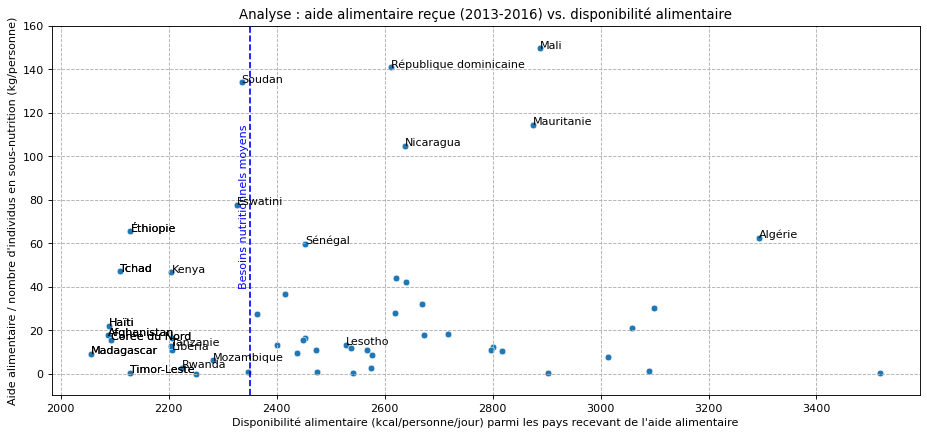

In [1036]:
DFto_plot.loc[DFto_plot['Zone'] == 'République populaire démocratique de Corée', 'Zone'] = 'Corée du Nord'
DFto_plot.loc[DFto_plot['Zone'] == 'République-Unie de Tanzanie', 'Zone'] = 'Tanzanie'
DFto_plot.loc[DFto_plot['Zone'] == 'Bolivie (État plurinational de)', 'Zone'] = 'Bolivie'

fig = plt.figure(figsize=(14,6), dpi=80)

sb.scatterplot(data=DFto_plot,
               x='Disponibilité alimentaire (Kcal/personne/jour)',
               y='Aide / individu sous-nutrition')

plt.xlabel("Disponibilité alimentaire (kcal/personne/jour) parmi les pays recevant de l'aide alimentaire")
plt.ylabel("Aide alimentaire / nombre d'individus en sous-nutrition (kg/personne)")
plt.ylim([-10,160])
plt.grid(visible=True, axis='both', linestyle='--')
plt.title("Analyse : aide alimentaire reçue (2013-2016) vs. disponibilité alimentaire")

DFto_plot_byAide = DFto_plot.sort_values('Aide / individu sous-nutrition', ascending=False, ignore_index=True)
DFto_plot_byDispo = DFto_plot.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True, ignore_index=True)
DFto_plot_byPropSN = DFto_plot.sort_values('Proportion sous-nutrition (%)', ascending=False, ignore_index=True)

plt.plot([Besoin_moyen]*18, np.linspace(-10,160,18), color='blue', linestyle='dashed')
plt.text(Besoin_moyen-20,40,"Besoins nutritionnels moyens",rotation=90, color='blue')

nb_points = 10

for i in range(nb_points):
    plt.annotate(DFto_plot_byAide['Zone'][i],
                 xy=(DFto_plot_byAide['Disponibilité alimentaire (Kcal/personne/jour)'][i],
                     DFto_plot_byAide['Aide / individu sous-nutrition'][i]),
                 textcoords='data')

    plt.annotate(DFto_plot_byDispo['Zone'][i],
                 xy=(DFto_plot_byDispo['Disponibilité alimentaire (Kcal/personne/jour)'][i],
                     DFto_plot_byDispo['Aide / individu sous-nutrition'][i]),
                 textcoords='data')

    plt.annotate(DFto_plot_byPropSN['Zone'][i],
                 xy=(DFto_plot_byPropSN['Disponibilité alimentaire (Kcal/personne/jour)'][i],
                     DFto_plot_byPropSN['Aide / individu sous-nutrition'][i]),
                 textcoords='data')

plt.show()

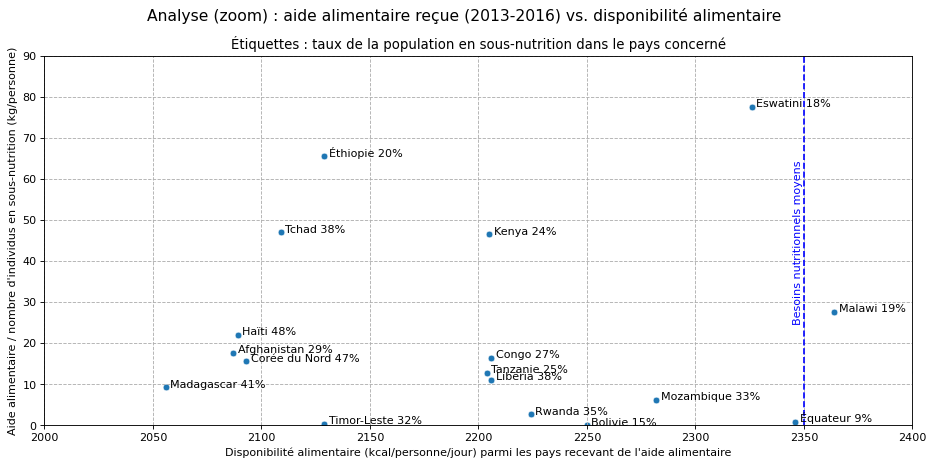

In [1037]:
fig = plt.figure(figsize=(14,6), dpi=80)

sb.scatterplot(data=DFto_plot,
               x='Disponibilité alimentaire (Kcal/personne/jour)',
               y='Aide / individu sous-nutrition')

plt.xlabel("Disponibilité alimentaire (kcal/personne/jour) parmi les pays recevant de l'aide alimentaire")
plt.ylabel("Aide alimentaire / nombre d'individus en sous-nutrition (kg/personne)")
plt.xlim([2000,2400])
plt.ylim([0,90])
plt.grid(visible=True, axis='both', linestyle='--')
plt.suptitle("Analyse (zoom) : aide alimentaire reçue (2013-2016) vs. disponibilité alimentaire", fontsize=14)
plt.title("Étiquettes : taux de la population en sous-nutrition dans le pays concerné")

DFto_plot_byAide = DFto_plot.sort_values('Aide / individu sous-nutrition', ascending=False, ignore_index=True)
DFto_plot_byDispo = DFto_plot.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True, ignore_index=True)
DFto_plot_byPropSN = DFto_plot.sort_values('Proportion sous-nutrition (%)', ascending=False, ignore_index=True)

plt.plot([Besoin_moyen]*18, np.linspace(0,90,18), color='blue', linestyle='dashed')
plt.text(Besoin_moyen-5,25,"Besoins nutritionnels moyens",rotation=90, color='blue')

nb_points = 20

for i in range(nb_points):

    plt.annotate(DFto_plot_byDispo['Zone'][i] + ' %.0f' %DFto_plot_byDispo['Proportion sous-nutrition (%)'][i] +'%',
                 xy=(DFto_plot_byDispo['Disponibilité alimentaire (Kcal/personne/jour)'][i],
                     DFto_plot_byDispo['Aide / individu sous-nutrition'][i]),
                 xytext=(2+DFto_plot_byDispo['Disponibilité alimentaire (Kcal/personne/jour)'][i],
                         DFto_plot_byDispo['Aide / individu sous-nutrition'][i]),
                 textcoords='data')
    
plt.savefig("Pays_vulnerables.png")

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.4 - Proportion de produits réexportés par rapport à la disponibilité globale</h3>
</div>

On dit qu'un pays réexporte un produit si celui-ci est à la fois importé et exporté par ce même pays. Autrement dit, soit ce produit "transite", soit il est remplacé dans les flux commerciaux par un produit similaire.<br>
Dans les 2 cas, cela a une empreinte carbone non-négligeable alors qu'aucune quantité de produit (dans le meilleur des cas) n'a été consommée pour les utilisations identifiées de notre étude (nourriture, pertes, aliments pour animaux, semences, traitement, autres utilisations).<br>
Pour une ligne de donnée du fichier aide_alimentaire, la quantité de produit réexportée se calcule simplement en prenant <i>min(Importations, Exportations)</i>.

In [1043]:
dispo_alm['Réexport'] = dispo_alm[['Exportations - Quantité','Importations - Quantité']].min(axis=1)
display(dispo_alm)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Réexport
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,0.0
1,Afghanistan,Agrumes - Autres,vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2000000.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,Viande - Autre,animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1054]:
data_reexp = dispo_alm.iloc[:,[1,9,-1]]
display(data_reexp.loc[data_reexp['Disponibilité intérieure']<0])

,Produit,Disponibilité intérieure,Réexport
343,Aliments pour enfants,-3.200000e+07,37000000.0
703,Aliments pour enfants,-2.400000e+07,1000000.0
732,Huil Plantes Oleif Autr,-1.130000e+08,17000000.0
914,Haricots,-1.800000e+07,7000000.0
1443,Aliments pour enfants,-4.000000e+06,18000000.0
...,...,...,...
15277,Huil Plantes Oleif Autr,-1.900000e+07,1000000.0
15300,Noix,-2.300000e+07,3000000.0
15343,Aliments pour enfants,-3.500000e+07,2000000.0
15408,Plantes Oleiferes - Autre,-3.430000e+09,263000000.0


In [1056]:
#On agrège par produit
data_reexp_agg = data_reexp.groupby('Produit')[['Disponibilité intérieure','Réexport']].sum()
data_reexp_agg['Taux Réexport (%)'] = round(100*data_reexp_agg['Réexport']/data_reexp_agg['Disponibilité intérieure'],2)

display(data_reexp_agg.sort_values('Taux Réexport (%)', ascending=False).head(15))

,Disponibilité intérieure,Réexport,Taux Réexport (%)
Produit,,,
Aliments pour enfants,8.400000e+07,3.210000e+08,382.14
Feve de Cacao,5.252000e+09,4.921000e+09,93.70
Huile de Coco,3.243000e+09,1.641000e+09,50.60
Café,8.176000e+09,3.634000e+09,44.45
Huiles de Poissons,8.280000e+08,3.540000e+08,42.75
Huil Plantes Oleif Autr,6.271000e+09,2.579000e+09,41.13
Poissons Pelagiques,4.102400e+10,1.285000e+10,31.32
Cephalopodes,3.599000e+09,1.030000e+09,28.62
Huiles de Foie de Poisso,1.800000e+07,5.000000e+06,27.78


Un taux de réexport élevé correspond à un produit très demandé commercialement (ce qui explique certaines valeurs de disponibilité intérieure négatives) mais pas toujours très consommé.

In [1060]:
print("Taux de réexport global (en masse de marchandise) :",
      round(100*(data_reexp_agg['Réexport']).sum()/data_reexp_agg['Disponibilité intérieure'].sum(),2),'%')

Taux de réexport global (en masse de marchandise) : 3.68 %
